# Project Title : Face Emotion Recognition (FER)

- multiclass classification
- dataset : [kaggle Fer-2013](https://www.kaggle.com/datasets/msambare/fer2013?datasetId=786787)
  - The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

  - label has seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). 
    1. 😠 **angry**
    2. 😖 **disgust**
    3. 😨 **fear**
    4. 😊 **happy**
    5. 😐 **neutral**
    6. ☹️ **sad**
    7. 😯 **surprise**

  - Ada tujuh emosi universal yang diakui menurut psikolog Dr. Paul Ekman. Di bawah ini adalah tujuh emosi wajah (ekspresi wajah) yang umumnya terjadi.

    - Bahagia : Mengangkat alis dan sudut mulut
    Terkejut : Alis terangkat tetapi tidak menyatu, kelopak mata atas terangkat, rahang turun
    - Marah : Alis ditarik ke bawah, mata terbuka lebar, bibir terkatup rapat
    - Takut : Rahang terbuka, bibir ditekan ke belakang secara horizontal, kelopak mata atas terangkat
    - Sedih : Mengerutkan kening dengan sudut bibir ditarik ke bawah, sudut bagian dalam alis disatukan, kelopak mata terkulai.
    - Jijik : Bibir atas terangkat dalam bentuk seperti 'u', alis diturunkan, kerutan hidung
    - Netral :Bibir horizontal, alis tidak terangkat, dan mata tidak terbuka lebar.

  - The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

  - our dataset already split into 80% data training and 20% data testing


- Stages:
  - Build Model
  - Real time prediction
  - Deployment

# Preparation

## Import Library

In [ ]:
import zipfile,os
import tensorflow as tf
from tensorflow import keras

# modeling
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator
  
from sklearn.model_selection import cross_val_predict, cross_val_score 

# evaluate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import itertools

from keras.preprocessing import image

#real time
import cv2
import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- data loading and extracting
  - we have data in zip file, so we need to extraxt it
  - data alrady splitted into data training and testing

In [ ]:
# melakukan ekstraksi pada file zip    
local_zip = '/content/drive/MyDrive/ML/proa/demo_day/Salinan facial_expression_recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
###define path image
base_dir  = '/tmp/images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

## Data Exploratory

### check number images of each label

- Tahapan Eksploratori Data Analsis akan dimulai dengan mencari tahu berapa jumlah gambar yang terdapat di setiap kategori ekspresi yang ada di data train dan data validation yang sudah di input sebelumnya.

- ways 1

In [ ]:
os.listdir('/tmp/images/train/')

['fear', 'angry', 'surprise', 'neutral', 'disgust', 'sad', 'happy']

jumlah label = 7

In [ ]:
label = ['happy', 'disgust', 'angry', 'fear', 'surprise', 'neutral', 'sad']

In [ ]:
for x in label: 
  globals()[f"listDir_{x}"] = os.listdir(os.path.join( os.path.join(train_dir, x) )) 
  varLen = len(globals()[f"listDir_{x}"])
  print(f"total training images {x} : {varLen} ")

print('')

for x in label: 
  globals()[f"listDir_{x}"] = os.listdir(os.path.join( os.path.join(validation_dir, x) )) 
  varLen = len(globals()[f"listDir_{x}"])
  print(f"total validation images {x} : {varLen} ")

total training images happy : 7164 
total training images disgust : 436 
total training images angry : 3993 
total training images fear : 4103 
total training images surprise : 3205 
total training images neutral : 4982 
total training images sad : 4938 

total validation images happy : 1825 
total validation images disgust : 111 
total validation images angry : 960 
total validation images fear : 1018 
total validation images surprise : 797 
total validation images neutral : 1216 
total validation images sad : 1139 


total training   = 28821 <br>
total validation = 7066

The face expressions in our dataset are pretty balanced, except for the 'disgust' category.

- ways 2

In [ ]:
train_data_dir='/tmp/images/train'
validation_data_dir='/tmp/images/validation'

In [ ]:
import glob as gb
for folder in os.listdir(train_data_dir):
    files = gb.glob(pathname= str(train_data_dir+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 4103 in folder fear
For training data, found 3993 in folder angry
For training data, found 3205 in folder surprise
For training data, found 4982 in folder neutral
For training data, found 436 in folder disgust
For training data, found 4938 in folder sad
For training data, found 7164 in folder happy


- visualisasi dataset

In [ ]:
def get_counts(path):
  emotions = os.listdir(path)

  cls_counts = {}
  for emotion in emotions:
    count = len(os.listdir(os.path.join(path, emotion)))
    # print(emotion, count)
    cls_counts[emotion] = count

  return cls_counts

train_counts = get_counts(train_data_dir)


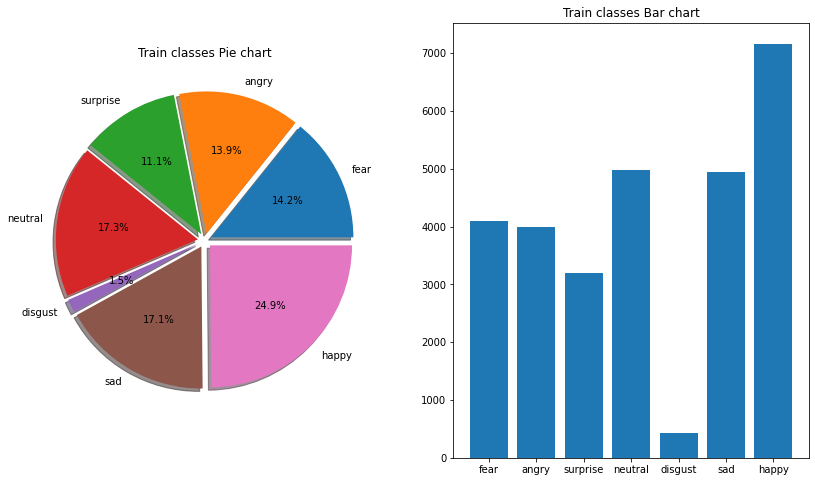

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (14, 8))

explode = [0.05] * 7
 

# ## Pie for training
ax0.set_title('Train classes Pie chart')
ax0.pie(
    train_counts.values(), 
    labels=train_counts.keys(), 
    explode=explode, 
    autopct='%1.1f%%', shadow=True)
ax1.set_title('Train classes Bar chart')
ax1.bar(train_counts.keys(), train_counts.values(), width=0.8)


# fig.savefig(r'path\img\persebaran.png')

plt.show()

ref piechart [link](https://pythontic.com/visualization/charts/piechart)

### Show images
- show image each emotion

In [ ]:
for x in label:  
  globals()[f"train_pic_dir_{x}"] = os.path.join(train_dir, x) 
  globals()[f"train_pic_dir_name_{x}"] = os.listdir(globals()[f"train_pic_dir_{x}"]) 

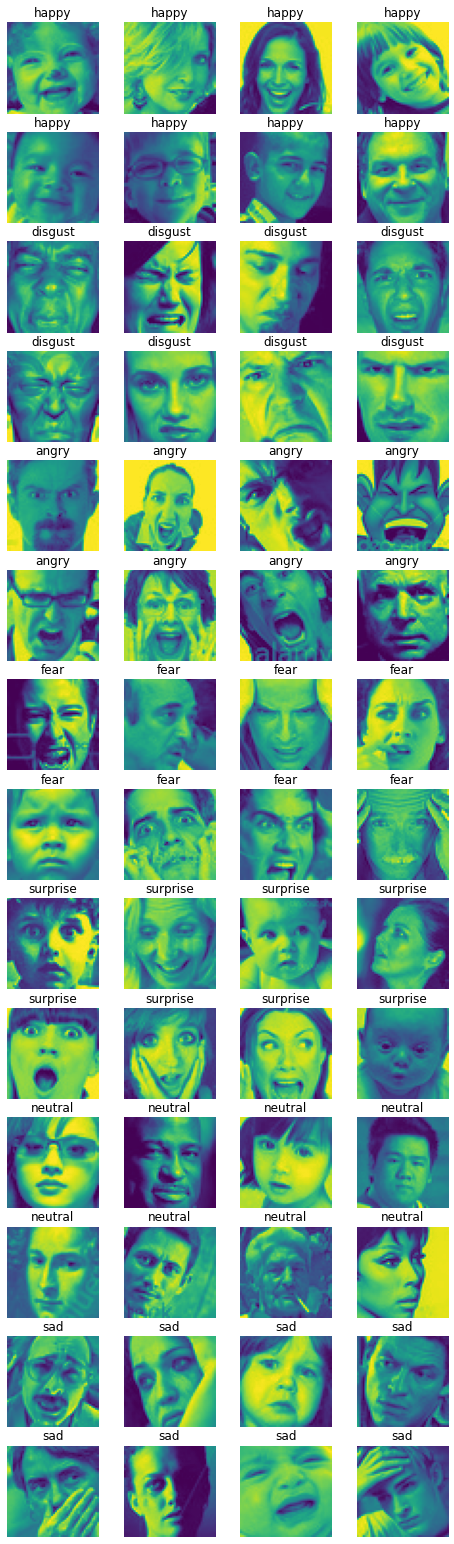

In [ ]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 24
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8

for x in label: 
  globals()[f"pic_{x}"] = [os.path.join(globals()[f"train_pic_dir_{x}"], fname) 
                  for fname in  globals()[f"train_pic_dir_name_{x}"][pic_index-8:pic_index]] 
 
for i, img_path in enumerate(pic_happy+pic_disgust+pic_angry+pic_fear+pic_surprise+pic_neutral+pic_sad):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
 
  if i<=7 : sp.set_title(label[0]) 
  if i>7 and i<=15  :sp.set_title(label[1]) 
  if i>15 and i<=23 :sp.set_title(label[2]) 
  if i>23 and i<=31 :sp.set_title(label[3]) 
  if i>31 and i<=39 :sp.set_title(label[4]) 
  if i>39 and i<=47 : sp.set_title(label[5]) 
  if i>47 : sp.set_title(label[6]) 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Can you guess which images are related to which expressions? 

This task is quite easy for a human, but it may be a bit challenging for a predictive algorithm because:
- the images have a low resolution
- the faces are not in the same position
- some images have text written on them
- some people hide part of their faces with their hands

However all this diversity of images will contribute to make a more generalizable model.

### cek images shape 
- cek dimensi imgage
- Salah satu aspek penting dalam klasifikasi gambar adalah memahami dimensi dari gambar masukan. Kita perlu mengetahui ukuran dimensi gambar yang kita gunakan untuk membuat dimensi input yang tepat saat membangun model deep learning. Mari kita periksa dimensi dari gambar pertama.


- way 1

In [ ]:
import cv2

tmpImgDir = train_pic_dir_happy+'/'+train_pic_dir_name_happy[0]
img1 = cv2.imread(tmpImgDir, cv2.IMREAD_UNCHANGED)
 
# get dimensions of image
dimensions = img1.shape  

# height, width, number of channels in image
height = img1.shape[0]
width = img1.shape[1]
# channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
# print('Number of Channels : ',channels)

Image Dimension    :  (48, 48)
Image Height       :  48
Image Width        :  48


- way 2 

(48, 48)


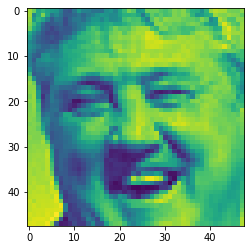

In [ ]:
img2 = image.load_img(train_pic_dir_happy+'/'+train_pic_dir_name_happy[0],target_size = (48,48),color_mode = "grayscale")
img2 = np.array(img2)
plt.imshow(img2)
print(img2.shape)

## Additional Function

### model evaluate

In [ ]:
def modelEvaluate(varModel,train_set,val_set) :
  train_loss, train_acc = varModel.evaluate(train_set)
  test_loss, test_acc   = varModel.evaluate(val_set)
  print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

cek f1 score dan confusion matrix

- semakin mendekati 1 semakin bagus

In [ ]:
def plot_confusion(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
 

     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    # plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
# a tuple for all the class names
# target_names = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
# plot_confusion_matrix(cm, target_names)

In [ ]:
# show the confusion matrix of our predictions

def plot_confusion2(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, normalize=True ):
    
    if normalize :
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2. if normalize else cm.max() / 1.5
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    


In [ ]:
def f1score_conf(model,val_gen):

  # y_pred = [np.argmax(probas) for probas in predictions]
  # y_test = validation_generator_4.classes
  class_names = val_gen.class_indices.keys()

  test_generator =  val_gen
  y_true = test_generator.classes
  y_hat =  model.predict(test_generator)
  y_hat = tf.argmax(y_hat, axis = 1).numpy()
  f1 = f1_score(y_true, y_hat, average='micro')
  print('f1 score {}'.format(f1))
    
  cnf_matrix = confusion_matrix(y_true = y_true, y_pred = y_hat) 

  plot_confusion2(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
  plot_confusion2(cnf_matrix, classes=class_names, title='confusion matrix', normalize=False)

- https://stackoverflow.com/questions/61466961/what-do-the-normalize-parameters-mean-in-sklearns-confusion-matrix

### model histogram

- We got outputs at each step of the training phase. All those outputs were saved into the 'history' variable. We can use it to plot the evolution of the loss and accuracy on both the train and validation datasets:

In [ ]:
# Visualize Loss & Accuracy

def modelHistogram(varHistory) :
  %matplotlib inline
  import matplotlib.pyplot as plt
  acc = varHistory.history['accuracy']
  val_acc = varHistory.history['val_accuracy']
  loss = varHistory.history['loss']
  val_loss = varHistory.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

### Setup data generator for data preprocessing

Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator. 

It can also perform data augmentation while getting the images (randomly rotating the image, zooming, etc.). This method is often used as a way to artificially get more data when the dataset has a small size.

The function flow_from_directory() specifies how the generator should import the images (path, image size, colors, etc.).

- color mode : 'grayscale' or 'rgb'
- class mode : 'binary' or 'categorical'
- batch size : the batches in which the data is supposed to be fed 
- rescale parameter ensures the input in range [0,1]

data buatan menggunakan metode yang disebut dengan Image Augmentation. Image Augmentation adalah salah satu teknik yang berguna dalam membangun model yang diaman dapat meningkatkan jumlah data training tanpa perlu mencari atau menginput gambar baru. Tujuannya adalah untuk mengajarkan model tidak hanya dengan gambar asli tetapi juga modifikasi gambar, seperti membalik gambar, memutar gambar, memperbesar, memotong gambar, dll. Ini akan membuat model menjadi lebih baik dalam mengidentifikasi gambar. Untuk melakukan image augmentation kita menggunakan generator data gambar dengan bantuan Keras.

Jika ingin mengetahui lebih tentang bagaimana melakukan image augmentation menggunakan Keras dapat mengakses dokumentasi resminya [disini](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Sebelum melakukan augmentasi perlu juga kita mengatur ukuran batch untuk data sehingga model akan diperbarui setiap kali selesai training untuk satu batch. 

#### image generate 0

In [ ]:
# Set up Data generator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./225)

# Preprocess Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 900, #28821 dari total training / jumlah step (32)
    color_mode='grayscale',
    class_mode='categorical', 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 112, # bagi 8 dari batch training
    color_mode='grayscale',
    class_mode = 'categorical', 
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# See the shape of any data
train_sample=next(train_generator)
print(train_sample[0].shape)

(900, 48, 48, 1)


#### image generate 1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator
train_datagen_1 = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

test_datagen_1 = ImageDataGenerator(
    rescale = 1./225, 
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

# Preprocess Data

train_generator_1 = train_datagen_1.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 900, #28821 dari total training / jumlah step (32)
    color_mode='grayscale',
    class_mode='categorical', 
)

validation_generator_1 = test_datagen_1.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 112, # bagi 8 dari batch training
    color_mode='grayscale',
    class_mode = 'categorical', 
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#### image generate 2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator
train_datagen_1_2 = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

test_datagen_1_2 = ImageDataGenerator(rescale = 1./225)

# Preprocess Data

train_generator_1_2 = train_datagen_1_2.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 900, #28821 dari total training / jumlah step (32)
    color_mode='grayscale',
    class_mode='categorical', 
)

validation_generator_1_2 = test_datagen_1_2.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 112, # bagi 8 dari batch training
    color_mode='grayscale',
    class_mode = 'categorical', 
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#### image generate 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator
train_datagen_3 = ImageDataGenerator(  
    rescale = 1./255, 
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
  )

test_datagen_3 = ImageDataGenerator(rescale = 1./255  )

# Preprocess Data

train_generator_3 = train_datagen_3.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 128, #28821 dari total training / jumlah step (900)
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=True
)

validation_generator_3 = test_datagen_3.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 128, # bagi 8 dari batch training
    color_mode='grayscale',
    class_mode = 'categorical', 
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#### Image generate 4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator
train_datagen_4 = ImageDataGenerator()
test_datagen_4 = ImageDataGenerator()

# Preprocess Data

train_generator_4 = train_datagen_4.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 128, #28821 dari total training / jumlah step (900)
    color_mode='grayscale',
    class_mode='categorical', 
    shuffle=True
)

validation_generator_4 = test_datagen_4.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 128, # bagi 8 dari batch training
    color_mode='grayscale',
    class_mode = 'categorical', 
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### callback

In [ ]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi > 97%, training Stop!")
      self.model.stop_training = True

callbacks = myCallback()

### early stopping and callback and learning rate adjust

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks1 = [
    early_stopping,
    lr_scheduler,
]

### optims

In [ ]:
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
    optimizers.Adam(),
    RMSprop(learning_rate=0.001)
]

# Modeling

we have used 9 differetnt models and each model we try some hypertuning

The objective here is to try out different models such as CNN and some pre-trained architectures which comes under transfer learning approach. The model with highest accuracy will be taken into consideration

- glosarium
  - input layer : input layer in cnn that contain image data
  - convo layer : feature extractor layer
  - pooling layer : reduce dimensionality of each feature while retain (mempertahankan) the most important information.
  - Fully CL (Connected Layer) : layer that involve weight, biases, and neurons. it connects neurons in one layer to neurons in another layer.
  - output layer : contain label
  - batch normalization : improves the performance and stabiliy of CNNs by providing inputs with zero mean and unit variance
  - dropout reduces overfitting by randomly not updating the weights of some nodes. this helps prevent the NN from relying on one node in the layer too much


- note : Need to access the GPU in order to train the model faster.


## Model 1 (CNN Model)

### Model 1.0

In [ ]:
def createModel1(optim):
  model = Sequential()

  #1st CNN layer
  model.add(Conv2D(16, (3,3), activation="relu", input_shape=(48,48,1)) )
  model.add(MaxPooling2D(2,2) )

  #2nd CNN layer
  model.add(Conv2D(32, (3,3), activation="relu") )
  model.add(MaxPooling2D(2,2) )

  #3rd CNN layer
  model.add(Conv2D(64, (3,3), activation="relu") )
  model.add(MaxPooling2D(2,2) )
  model.add(Dropout(0.25) )

  model.add(Flatten() )

  #1st Fully connected layer 
  model.add(Dense(512, activation='relu') ) 

  #output layer
  model.add(Dense(7, activation= 'softmax') )

  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics = ['accuracy'])

  return model

In [ ]:
model = createModel1(RMSprop(lr=0.001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=[callbacks])

Epoch 1/60
32/32 - 51s - loss: 1.6227 - accuracy: 0.3685 - val_loss: 1.5641 - val_accuracy: 0.3944 - 51s/epoch - 2s/step
Epoch 2/60
32/32 - 51s - loss: 1.5633 - accuracy: 0.3993 - val_loss: 1.6771 - val_accuracy: 0.3527 - 51s/epoch - 2s/step
Epoch 3/60
32/32 - 52s - loss: 1.5274 - accuracy: 0.4134 - val_loss: 1.5205 - val_accuracy: 0.4192 - 52s/epoch - 2s/step
Epoch 4/60
32/32 - 50s - loss: 1.4991 - accuracy: 0.4253 - val_loss: 1.4890 - val_accuracy: 0.4290 - 50s/epoch - 2s/step
Epoch 5/60
32/32 - 53s - loss: 1.4578 - accuracy: 0.4431 - val_loss: 1.4235 - val_accuracy: 0.4584 - 53s/epoch - 2s/step
Epoch 6/60
32/32 - 52s - loss: 1.4349 - accuracy: 0.4509 - val_loss: 1.4523 - val_accuracy: 0.4541 - 52s/epoch - 2s/step
Epoch 7/60
32/32 - 50s - loss: 1.4187 - accuracy: 0.4566 - val_loss: 1.3965 - val_accuracy: 0.4720 - 50s/epoch - 2s/step
Epoch 8/60
32/32 - 50s - loss: 1.3901 - accuracy: 0.4676 - val_loss: 1.3754 - val_accuracy: 0.4809 - 50s/epoch - 2s/step
Epoch 9/60
32/32 - 50s - loss: 1

In [ ]:
modelEvaluate(model)

64/64 [==============================] - 2s 34ms/step - loss: 1.2859 - accuracy: 0.5735
final train accuracy = 88.18 , validation accuracy = 57.35


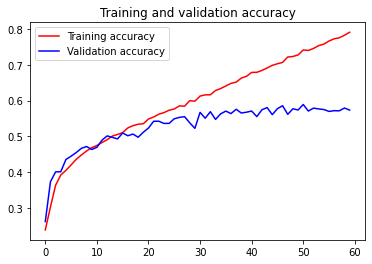

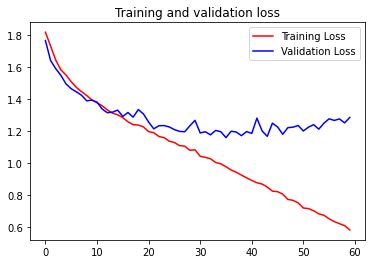

In [ ]:
modelHistogram(history)

### Model 1.1

- +using image generate 1

In [ ]:
model1_1 = createModel1(RMSprop(lr=0.001))

Epoch 1/60
32/32 - 26s - loss: 1.8277 - accuracy: 0.2390 - val_loss: 1.7829 - val_accuracy: 0.2627 - lr: 0.0010 - 26s/epoch - 801ms/step
Epoch 2/60
32/32 - 25s - loss: 1.7790 - accuracy: 0.2661 - val_loss: 1.7422 - val_accuracy: 0.2888 - lr: 0.0010 - 25s/epoch - 778ms/step
Epoch 3/60
32/32 - 24s - loss: 1.7246 - accuracy: 0.3029 - val_loss: 1.7244 - val_accuracy: 0.2873 - lr: 0.0010 - 24s/epoch - 759ms/step
Epoch 4/60
32/32 - 24s - loss: 1.6928 - accuracy: 0.3302 - val_loss: 1.6484 - val_accuracy: 0.3598 - lr: 0.0010 - 24s/epoch - 755ms/step
Epoch 5/60
32/32 - 24s - loss: 1.6586 - accuracy: 0.3455 - val_loss: 1.6346 - val_accuracy: 0.3723 - lr: 0.0010 - 24s/epoch - 764ms/step
Epoch 6/60
32/32 - 24s - loss: 1.6231 - accuracy: 0.3659 - val_loss: 1.5685 - val_accuracy: 0.3943 - lr: 0.0010 - 24s/epoch - 755ms/step
Epoch 7/60
32/32 - 24s - loss: 1.5921 - accuracy: 0.3832 - val_loss: 1.5437 - val_accuracy: 0.4148 - lr: 0.0010 - 24s/epoch - 755ms/step
Epoch 8/60
32/32 - 24s - loss: 1.5770 - a

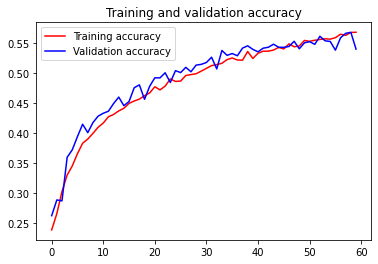

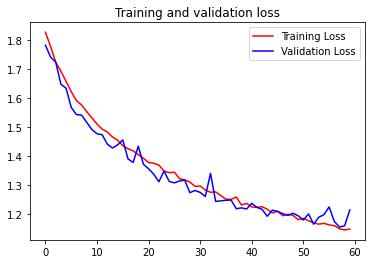

In [ ]:
history1_1 = model1_1.fit(
      train_generator_1,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator_1,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks)

modelHistogram(history1_1)

### model 1.2
- using image generate 2

In [ ]:
model1_2 = createModel1(RMSprop(lr=0.001))

In [ ]:
history1_2 = model1_2.fit(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks)

Epoch 1/60
32/32 - 29s - loss: 1.8187 - accuracy: 0.2415 - val_loss: 1.7777 - val_accuracy: 0.2617 - lr: 0.0010 - 29s/epoch - 911ms/step
Epoch 2/60
32/32 - 17s - loss: 1.7697 - accuracy: 0.2698 - val_loss: 1.7389 - val_accuracy: 0.3040 - lr: 0.0010 - 17s/epoch - 533ms/step
Epoch 3/60
32/32 - 17s - loss: 1.7238 - accuracy: 0.3009 - val_loss: 1.7333 - val_accuracy: 0.2852 - lr: 0.0010 - 17s/epoch - 530ms/step
Epoch 4/60
32/32 - 17s - loss: 1.6852 - accuracy: 0.3334 - val_loss: 1.5942 - val_accuracy: 0.3832 - lr: 0.0010 - 17s/epoch - 539ms/step
Epoch 5/60
32/32 - 17s - loss: 1.6457 - accuracy: 0.3577 - val_loss: 1.6233 - val_accuracy: 0.3888 - lr: 0.0010 - 17s/epoch - 529ms/step
Epoch 6/60
32/32 - 17s - loss: 1.6174 - accuracy: 0.3687 - val_loss: 1.5198 - val_accuracy: 0.4234 - lr: 0.0010 - 17s/epoch - 525ms/step
Epoch 7/60
32/32 - 17s - loss: 1.5866 - accuracy: 0.3851 - val_loss: 1.5079 - val_accuracy: 0.4247 - lr: 0.0010 - 17s/epoch - 529ms/step
Epoch 8/60
32/32 - 17s - loss: 1.5679 - a

NameError: ignored

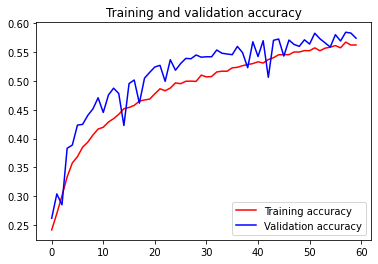

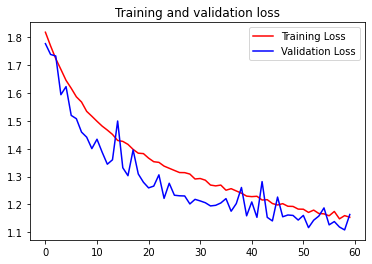

In [ ]:
modelHistogram(history1_2)

### model 1.3
- model 1.0 +Batch Normalization each CNN layer

In [ ]:
def createModel1_3(optim):  
  model = Sequential()

  #1st CNN layer
  model.add(Conv2D(16, (3,3), activation="relu", input_shape=(48,48,1)) )
  model.add(BatchNormalization() )
  model.add(MaxPooling2D(2,2) )

  #2nd CNN layer
  model.add(Conv2D(32, (3,3), activation="relu") )
  model.add(BatchNormalization() )
  model.add(MaxPooling2D(2,2) )

  #3rd CNN layer
  model.add(Conv2D(64, (3,3), activation="relu") )
  model.add(BatchNormalization() )
  model.add(MaxPooling2D(2,2) )
  model.add(Dropout(0.25) )

  model.add(Flatten() )

  #1st Fully Connected Layer 
  model.add(Dense(512, activation='relu') ) 

  #Output layer
  model.add(Dense(7, activation= 'softmax') )

  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics = ['accuracy'])

  return model

In [ ]:
model1_3 = createModel1_3(RMSprop(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
225/225 - 7s - loss: 0.0529 - accuracy: 0.9875 - val_loss: 1.7854 - val_accuracy: 0.5724 - lr: 3.9063e-06 - 7s/epoch - 33ms/step
Epoch 2/10
225/225 - 7s - loss: 0.0518 - accuracy: 0.9868 - val_loss: 1.7957 - val_accuracy: 0.5720 - lr: 3.9063e-06 - 7s/epoch - 32ms/step
Epoch 3/10
225/225 - 9s - loss: 0.0527 - accuracy: 0.9863 - val_loss: 1.7997 - val_accuracy: 0.5723 - lr: 3.9063e-06 - 9s/epoch - 38ms/step
Epoch 4/10
225/225 - 7s - loss: 0.0509 - accuracy: 0.9867 - val_loss: 1.8059 - val_accuracy: 0.5732 - lr: 3.9063e-06 - 7s/epoch - 32ms/step
Epoch 5/10
225/225 - 7s - loss: 0.0513 - accuracy: 0.9865 - val_loss: 1.8105 - val_accuracy: 0.5733 - lr: 3.9063e-06 - 7s/epoch - 32ms/step
Epoch 6/10
225/225 - 8s - loss: 0.0486 - accuracy: 0.9870 - val_loss: 1.8158 - val_accuracy: 0.5737 - lr: 3.9063e-06 - 8s/epoch - 38ms/step
Epoch 7/10
225/225 - 7s - loss: 0.0505 - accuracy: 0.9872 - val_loss: 1.8210 - val_accuracy: 0.5730 - lr: 3.9063e-06 - 7s/epoch - 32ms/step
Epoch 8/10
225/225 -

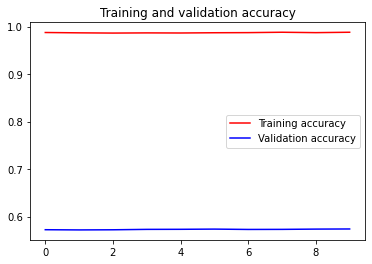

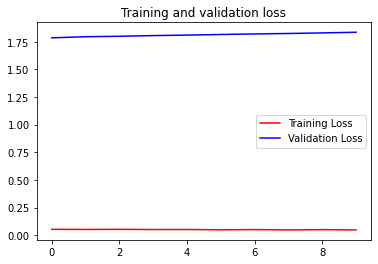

In [ ]:
history1_3 = model1_3.fit(
      train_generator_4,
      steps_per_epoch=train_generator_4.n//train_generator_4.batch_size,
      epochs=10,
      validation_data=validation_generator_4,
      validation_steps=validation_generator_4.n//validation_generator_4.batch_size,
      verbose=2,
      callbacks=callbacks1)

modelHistogram(history1_3)

# lr: 7.8125e-06 

f1 score 0.5742994622134163


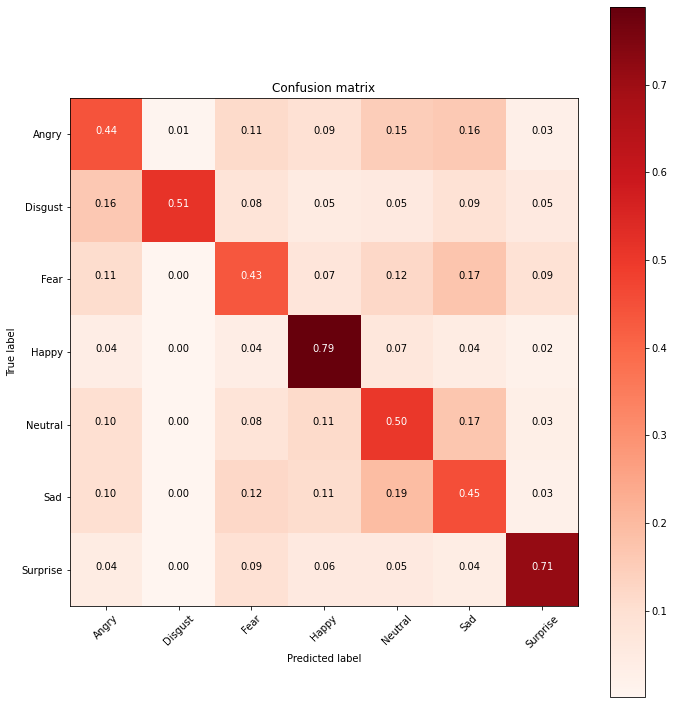

In [ ]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
f1score(model1_3,validation_generator_4,labels)

### model 1.4
- model 1.3 +image generate 2

Epoch 1/60
32/32 - 17s - loss: 1.7855 - accuracy: 0.4961 - val_loss: 1.5901 - val_accuracy: 0.5214 - lr: 3.1250e-05 - 17s/epoch - 536ms/step
Epoch 2/60
32/32 - 17s - loss: 1.7248 - accuracy: 0.5009 - val_loss: 1.5666 - val_accuracy: 0.5136 - lr: 3.1250e-05 - 17s/epoch - 529ms/step
Epoch 3/60
32/32 - 17s - loss: 1.6928 - accuracy: 0.4914 - val_loss: 1.5409 - val_accuracy: 0.5098 - lr: 3.1250e-05 - 17s/epoch - 533ms/step
Epoch 4/60
32/32 - 17s - loss: 1.6563 - accuracy: 0.4934 - val_loss: 1.5109 - val_accuracy: 0.5099 - lr: 3.1250e-05 - 17s/epoch - 527ms/step
Epoch 5/60
32/32 - 17s - loss: 1.6127 - accuracy: 0.4918 - val_loss: 1.4977 - val_accuracy: 0.5047 - lr: 3.1250e-05 - 17s/epoch - 530ms/step
Epoch 6/60
32/32 - 17s - loss: 1.6075 - accuracy: 0.4918 - val_loss: 1.4692 - val_accuracy: 0.5096 - lr: 3.1250e-05 - 17s/epoch - 536ms/step
Epoch 7/60
32/32 - 17s - loss: 1.5726 - accuracy: 0.4922 - val_loss: 1.4527 - val_accuracy: 0.5072 - lr: 3.1250e-05 - 17s/epoch - 536ms/step
Epoch 8/60

E

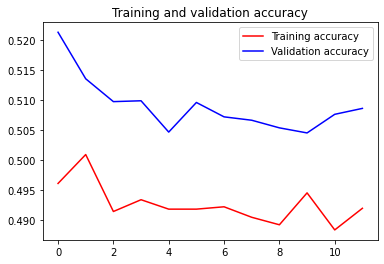

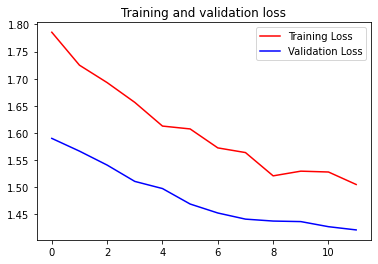

In [ ]:
history1_4 = model1_3.fit(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks)

modelHistogram(history1_4)

### model 1.5

- model 1.3 +Dropout each CNN Layer 

In [ ]:
def createModel1_5(optim):
  model = Sequential()    

  #1st CNN Layer                       
  model.add( Conv2D(16, (3,3), activation="relu", input_shape=(48,48,1)) )
  model.add( BatchNormalization() )
  model.add( MaxPooling2D(2,2) )
  model.add( Dropout(0.05) )

  #2nd CNN Layer
  model.add( Conv2D(32, (3,3), activation="relu") )
  model.add( BatchNormalization() )
  model.add( MaxPooling2D(2,2) )
  model.add( Dropout(0.10) )

  #3rd CNN Layer
  model.add( Conv2D(64, (3,3), activation="relu") )
  model.add( BatchNormalization() )
  model.add( MaxPooling2D(2,2) )
  model.add( Dropout(0.25) )

  model.add( Flatten() )

  #1st Fully Connected Layer
  model.add( Dense(512, activation='relu') )

  #Output layer
  model.add( Dense(7, activation= 'softmax') )

  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics = ['accuracy'])

  return model

In [ ]:
model1_5 = createModel1_5(RMSprop(learning_rate=0.001))

Epoch 1/60
32/32 - 8s - loss: 0.1855 - accuracy: 0.9349 - val_loss: 2.0390 - val_accuracy: 0.5688 - lr: 0.0010 - 8s/epoch - 252ms/step
Epoch 2/60
32/32 - 9s - loss: 0.1748 - accuracy: 0.9402 - val_loss: 2.0649 - val_accuracy: 0.5720 - lr: 0.0010 - 9s/epoch - 271ms/step
Epoch 3/60
32/32 - 8s - loss: 0.1773 - accuracy: 0.9393 - val_loss: 1.9868 - val_accuracy: 0.5678 - lr: 0.0010 - 8s/epoch - 235ms/step
Epoch 4/60
32/32 - 8s - loss: 0.1803 - accuracy: 0.9370 - val_loss: 2.0425 - val_accuracy: 0.5558 - lr: 0.0010 - 8s/epoch - 236ms/step
Epoch 5/60
32/32 - 7s - loss: 0.1701 - accuracy: 0.9419 - val_loss: 2.1005 - val_accuracy: 0.5727 - lr: 0.0010 - 7s/epoch - 234ms/step
Epoch 6/60
32/32 - 7s - loss: 0.1679 - accuracy: 0.9427 - val_loss: 2.0324 - val_accuracy: 0.5614 - lr: 0.0010 - 7s/epoch - 234ms/step
Epoch 7/60
32/32 - 7s - loss: 0.1733 - accuracy: 0.9410 - val_loss: 2.0092 - val_accuracy: 0.5686 - lr: 0.0010 - 7s/epoch - 234ms/step
Epoch 8/60
32/32 - 7s - loss: 0.1600 - accuracy: 0.9453

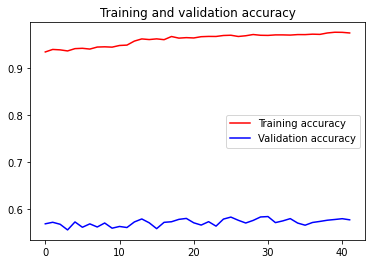

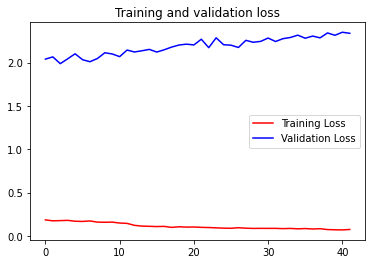

In [ ]:
history1_5 = model1_5.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks1)

modelEvaluate(model1_5,train_generator,validation_generator)
modelHistogram(history1_5)

In [ ]:
#save model menjadi .h5
model1_5.save('model1_5.h5')

### Model 1.6

- model 1.5 +image generate 2

In [ ]:
model1_6 = createModel1_5(RMSprop(learning_rate=0.001))

In [ ]:
history1_6 = model1_6.fit(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=100,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks)



Epoch 1/100
32/32 - 30s - loss: 2.5833 - accuracy: 0.2498 - val_loss: 2.9797 - val_accuracy: 0.0157 - lr: 0.0010 - 30s/epoch - 934ms/step
Epoch 2/100
32/32 - 18s - loss: 1.7304 - accuracy: 0.3218 - val_loss: 4.0747 - val_accuracy: 0.0157 - lr: 0.0010 - 18s/epoch - 549ms/step
Epoch 3/100
32/32 - 17s - loss: 1.6483 - accuracy: 0.3554 - val_loss: 4.6084 - val_accuracy: 0.0157 - lr: 0.0010 - 17s/epoch - 546ms/step
Epoch 4/100
32/32 - 18s - loss: 1.5842 - accuracy: 0.3828 - val_loss: 2.8960 - val_accuracy: 0.1347 - lr: 0.0010 - 18s/epoch - 549ms/step
Epoch 5/100
32/32 - 18s - loss: 1.5453 - accuracy: 0.3999 - val_loss: 3.1313 - val_accuracy: 0.1615 - lr: 0.0010 - 18s/epoch - 548ms/step
Epoch 6/100
32/32 - 18s - loss: 1.5137 - accuracy: 0.4157 - val_loss: 2.7847 - val_accuracy: 0.1729 - lr: 0.0010 - 18s/epoch - 551ms/step
Epoch 7/100
32/32 - 18s - loss: 1.4758 - accuracy: 0.4309 - val_loss: 2.2345 - val_accuracy: 0.2894 - lr: 0.0010 - 18s/epoch - 550ms/step
Epoch 8/100
32/32 - 18s - loss: 1.

NameError: ignored

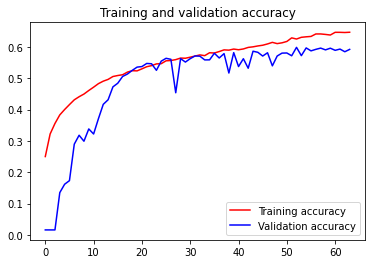

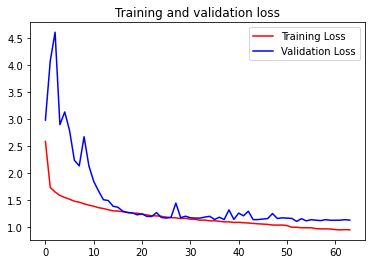

In [ ]:
modelHistogram(history1_6)

## Model 2 (ResNet50)

- "ResNet50" is a convolutional neural network that is 50 layers deep. ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. It is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer.

In [ ]:
# Set up Data generator
train_set = ImageDataGenerator(rescale = 1./255)
test_set = ImageDataGenerator(rescale = 1./225)

# Preprocess Data
train_gen = train_set.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 900, #28821 dari total training / jumlah step (32) 
    class_mode='categorical', 
)

val_gen = test_set.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 112, # bagi 8 dari batch training 
    class_mode = 'categorical', 
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50 

In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

In [ ]:
# Building Model

def createModel2(optim):
  model2=Sequential()
  model2.add(base_model)

  model2.add(Dropout(0.5))
  model2.add(Flatten())
  model2.add(BatchNormalization())

  # 1st fully connected layer 
  model2.add(Dense(32,kernel_initializer='he_uniform'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(Dropout(0.5))

  # 2nd fully connected layer
  model2.add(Dense(32,kernel_initializer='he_uniform'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(Dropout(0.5))

  # 3rd fully connected layer
  model2.add(Dense(32,kernel_initializer='he_uniform'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))

  #output layer
  model2.add(Dense(7,activation='softmax'))

  model2.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics = ['accuracy']) 

  return model2

In [ ]:
# Model Summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 32)                262176    
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                      

In [ ]:
model2 = createModel2(optims[0])

In [ ]:
history2 = model2.fit(
      train_gen, 
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=20,
      validation_data=validation_gen, 
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks)

Epoch 1/20
32/32 - 22s - loss: 2.0250 - accuracy: 0.1932 - val_loss: 1.9859 - val_accuracy: 0.1165 - 22s/epoch - 698ms/step
Epoch 2/20
32/32 - 11s - loss: 1.9316 - accuracy: 0.2277 - val_loss: 1.9723 - val_accuracy: 0.1441 - 11s/epoch - 352ms/step
Epoch 3/20
32/32 - 11s - loss: 1.8820 - accuracy: 0.2283 - val_loss: 1.8969 - val_accuracy: 0.2256 - 11s/epoch - 356ms/step
Epoch 4/20
32/32 - 11s - loss: 1.8521 - accuracy: 0.2369 - val_loss: 1.8815 - val_accuracy: 0.1731 - 11s/epoch - 351ms/step
Epoch 5/20
32/32 - 11s - loss: 1.8377 - accuracy: 0.2434 - val_loss: 1.8721 - val_accuracy: 0.1946 - 11s/epoch - 345ms/step
Epoch 6/20
32/32 - 12s - loss: 1.8186 - accuracy: 0.2501 - val_loss: 1.8231 - val_accuracy: 0.2494 - 12s/epoch - 377ms/step
Epoch 7/20
32/32 - 11s - loss: 1.8015 - accuracy: 0.2539 - val_loss: 1.8172 - val_accuracy: 0.2545 - 11s/epoch - 348ms/step
Epoch 8/20
32/32 - 11s - loss: 1.7984 - accuracy: 0.2575 - val_loss: 1.8248 - val_accuracy: 0.2379 - 11s/epoch - 345ms/step
Epoch 9/

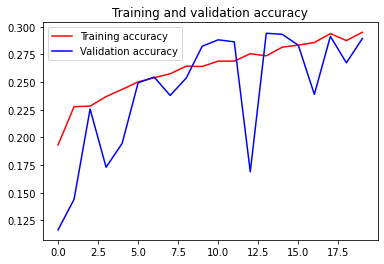

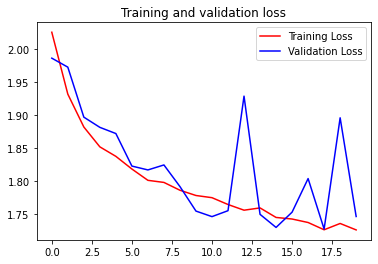

In [ ]:
modelHistogram(history2)

## Model 3 ( Default Arsitektur DCNN Model )

- Default Arsitektur DCNN Model 

### model 3.0

- +optim: RMSprop


In [ ]:
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used `ELU` as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. `he_normal` kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name='DCNN')

    #1st CNN Layer
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(48, 48, 1),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))

    #2nd CNN Layer
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2')) 
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    #3rd CNN Layer
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))

    # 4th CNN Layer
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    # 5th CNN Layer
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))

    # 6th CNN Layer
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))

    #1st Fully connected layer    
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7')) 
    net.add(Dropout(0.6, name='dropout_4'))
    
    # Output layer
    net.add(
        Dense(
            7,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [ ]:
# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
model3 = build_net(optims[3]) 

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [ ]:
history3 = model3.fit_generator(
      train_generator, 
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator, 
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
32/32 - 27s - loss: 2.3734 - accuracy: 0.2511 - val_loss: 3.6960 - val_accuracy: 0.1557 - lr: 0.0010 - 27s/epoch - 846ms/step
Epoch 2/60
32/32 - 17s - loss: 1.8824 - accuracy: 0.3289 - val_loss: 2.8098 - val_accuracy: 0.2519 - lr: 0.0010 - 17s/epoch - 525ms/step
Epoch 3/60
32/32 - 17s - loss: 1.6780 - accuracy: 0.3829 - val_loss: 3.4105 - val_accuracy: 0.2143 - lr: 0.0010 - 17s/epoch - 533ms/step
Epoch 4/60
32/32 - 17s - loss: 1.5509 - accuracy: 0.4194 - val_loss: 1.5838 - val_accuracy: 0.4253 - lr: 0.0010 - 17s/epoch - 537ms/step
Epoch 5/60
32/32 - 17s - loss: 1.4549 - accuracy: 0.4478 - val_loss: 1.6074 - val_accuracy: 0.4192 - lr: 0.0010 - 17s/epoch - 532ms/step
Epoch 6/60
32/32 - 17s - loss: 1.3850 - accuracy: 0.4725 - val_loss: 1.4145 - val_accuracy: 0.4713 - lr: 0.0010 - 17s/epoch - 531ms/step
Epoch 7/60
32/32 - 17s - loss: 1.3382 - accuracy: 0.4950 - val_loss: 1.6681 - val_accuracy: 0.4618 - lr: 0.0010 - 17s/epoch - 531ms/step
Epoch 8/60
32/32 - 17s - loss: 1.2933 - a

In [ ]:
modelEvaluate(model3)

64/64 [==============================] - 2s 33ms/step - loss: 1.2966 - accuracy: 0.5003
final train accuracy = 50.86 , validation accuracy = 50.03


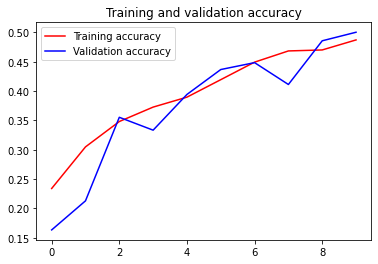

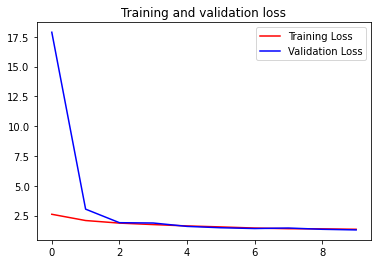

In [ ]:
modelHistogram(history3)

### model 3.1

- +optim: Nadam
- +image generate 3

In [ ]:
model3_1 = build_net(optims[1]) 

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [ ]:
history3_1 = model3_1.fit(
      train_generator_3, 
      steps_per_epoch=train_generator_3.n//train_generator_3.batch_size,
      epochs=100,
      validation_data=validation_generator_3, 
      validation_steps=validation_generator_3.n//validation_generator_3.batch_size,
      verbose=2,
      callbacks=callbacks1,
      use_multiprocessing=True)

Epoch 1/100
225/225 - 27s - loss: 2.2134 - accuracy: 0.2169 - val_loss: 1.7391 - val_accuracy: 0.3143 - lr: 0.0010 - 27s/epoch - 120ms/step
Epoch 2/100
225/225 - 25s - loss: 1.7805 - accuracy: 0.2928 - val_loss: 1.5675 - val_accuracy: 0.3841 - lr: 0.0010 - 25s/epoch - 110ms/step
Epoch 3/100
225/225 - 25s - loss: 1.6396 - accuracy: 0.3500 - val_loss: 1.4689 - val_accuracy: 0.4260 - lr: 0.0010 - 25s/epoch - 110ms/step
Epoch 4/100
225/225 - 25s - loss: 1.5421 - accuracy: 0.4006 - val_loss: 1.4114 - val_accuracy: 0.4659 - lr: 0.0010 - 25s/epoch - 109ms/step
Epoch 5/100
225/225 - 24s - loss: 1.4619 - accuracy: 0.4344 - val_loss: 1.4515 - val_accuracy: 0.4732 - lr: 0.0010 - 24s/epoch - 108ms/step
Epoch 6/100
225/225 - 24s - loss: 1.4058 - accuracy: 0.4617 - val_loss: 1.2726 - val_accuracy: 0.5246 - lr: 0.0010 - 24s/epoch - 108ms/step
Epoch 7/100
225/225 - 25s - loss: 1.3546 - accuracy: 0.4859 - val_loss: 1.2348 - val_accuracy: 0.5344 - lr: 0.0010 - 25s/epoch - 109ms/step
Epoch 8/100
225/225 

f1 score 0.6975658080951033


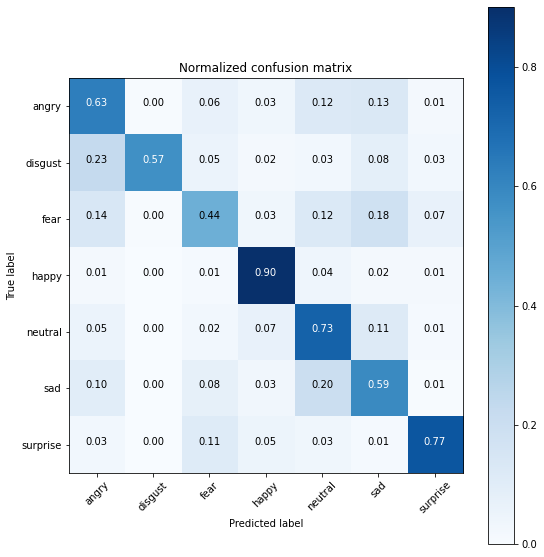

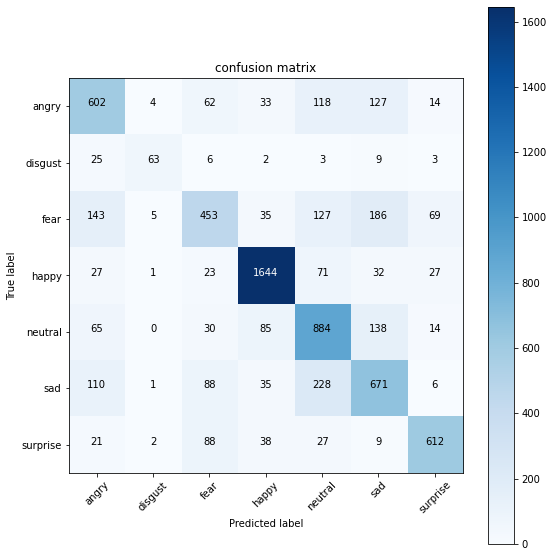

In [ ]:
f1score_conf(model3_1,validation_generator_3)

In [ ]:
#save model menjadi .h5
model3_1.save('model3_1_rev.h5')

In [ ]:
modelEvaluate(model3_1,train_generator_3,validation_generator_3)

56/56 [==============================] - 2s 38ms/step - loss: 0.8776 - accuracy: 0.6976
final train accuracy = 76.26 , validation accuracy = 69.76


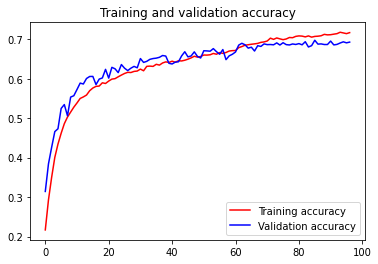

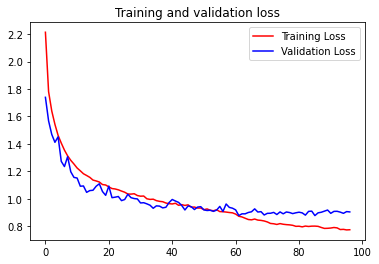

In [ ]:
modelHistogram(history3_1)

## Model 4 ( CNN Double Convo + Dropout)

### model 4.1

convo convo

In [ ]:
def createModel4(optim):
  model = Sequential()

  #1st CNN layer
  model.add(Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)) ) 

  #2nd CNN layer
  model.add(Conv2D(64, (3,3), activation="relu") ) 
  model.add(Dropout(0.25) )

  model.add(Flatten() )

  #1st Fully connected layer 
  model.add(Dense(512, activation='relu') ) 

  #output layer
  model.add(Dense(7, activation= 'softmax') )

  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics = ['accuracy'])

  return model

In [ ]:
model4 = createModel4('adam')

Epoch 1/20
32/32 - 19s - loss: 1.7477 - accuracy: 0.3601 - val_loss: 1.4039 - val_accuracy: 0.4687 - 19s/epoch - 597ms/step
Epoch 2/20
32/32 - 19s - loss: 1.5267 - accuracy: 0.4066 - val_loss: 1.3514 - val_accuracy: 0.4905 - 19s/epoch - 595ms/step
Epoch 3/20
32/32 - 19s - loss: 1.4663 - accuracy: 0.4320 - val_loss: 1.3406 - val_accuracy: 0.4904 - 19s/epoch - 598ms/step
Epoch 4/20
32/32 - 20s - loss: 1.4595 - accuracy: 0.4360 - val_loss: 1.3567 - val_accuracy: 0.4822 - 20s/epoch - 640ms/step
Epoch 5/20
32/32 - 20s - loss: 1.4441 - accuracy: 0.4458 - val_loss: 1.2982 - val_accuracy: 0.5074 - 20s/epoch - 616ms/step
Epoch 6/20
32/32 - 19s - loss: 1.4039 - accuracy: 0.4561 - val_loss: 1.3018 - val_accuracy: 0.5061 - 19s/epoch - 595ms/step
Epoch 7/20
32/32 - 19s - loss: 1.3825 - accuracy: 0.4694 - val_loss: 1.2979 - val_accuracy: 0.5041 - 19s/epoch - 589ms/step
Epoch 8/20
32/32 - 19s - loss: 1.3776 - accuracy: 0.4718 - val_loss: 1.3028 - val_accuracy: 0.5011 - 19s/epoch - 592ms/step
Epoch 9/

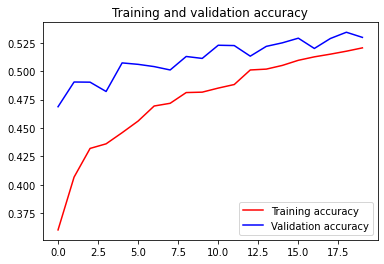

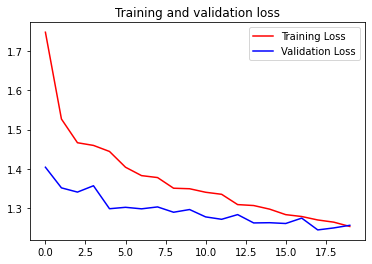

In [ ]:
history4 = model4.fit(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=20,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks)

modelEvaluate(model4,train_generator_1_2,validation_generator_1_2)
modelHistogram(history4)

Epoch 1/50
32/32 - 13s - loss: 2.5314 - accuracy: 0.1939 - val_loss: 1.7952 - val_accuracy: 0.2632 - lr: 0.0010 - 13s/epoch - 395ms/step
Epoch 2/50
32/32 - 10s - loss: 1.7337 - accuracy: 0.2989 - val_loss: 1.6653 - val_accuracy: 0.3596 - lr: 0.0010 - 10s/epoch - 297ms/step
Epoch 3/50
32/32 - 9s - loss: 1.6094 - accuracy: 0.3779 - val_loss: 1.5727 - val_accuracy: 0.3965 - lr: 0.0010 - 9s/epoch - 296ms/step
Epoch 4/50
32/32 - 10s - loss: 1.5084 - accuracy: 0.4235 - val_loss: 1.5083 - val_accuracy: 0.4287 - lr: 0.0010 - 10s/epoch - 300ms/step
Epoch 5/50
32/32 - 10s - loss: 1.4092 - accuracy: 0.4655 - val_loss: 1.4737 - val_accuracy: 0.4421 - lr: 0.0010 - 10s/epoch - 302ms/step
Epoch 6/50
32/32 - 10s - loss: 1.3315 - accuracy: 0.4982 - val_loss: 1.4392 - val_accuracy: 0.4533 - lr: 0.0010 - 10s/epoch - 300ms/step
Epoch 7/50
32/32 - 10s - loss: 1.2514 - accuracy: 0.5276 - val_loss: 1.4260 - val_accuracy: 0.4694 - lr: 0.0010 - 10s/epoch - 314ms/step
Epoch 8/50
32/32 - 10s - loss: 1.1520 - acc

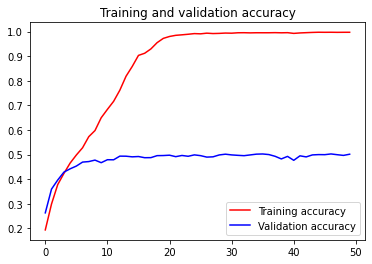

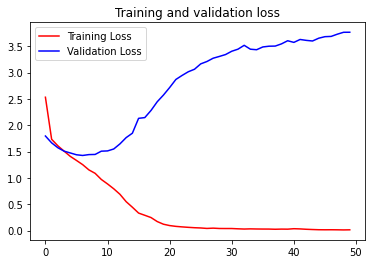

In [ ]:
history4 = model4.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=50,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks1)

modelEvaluate(model4,train_generator,validation_generator)
modelHistogram(history4)

In [ ]:
model4.save('model4.h5')

### model 4.2

In [ ]:
def createModel4_2(optim):
  model = Sequential()

  #1st CNN layer
  model.add(Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)) ) 

  #2nd CNN layer
  model.add(Conv2D(64, (3,3), activation="relu") ) 
  model.add(MaxPooling2D(2,2) )
  model.add(Dropout(0.25) )

  #3rd CNN layer
  model.add(Conv2D(128, (3,3), activation="relu" ) ) 

  #4th CNN layer
  model.add(Conv2D(256, (3,3), activation="relu") ) 
  model.add(MaxPooling2D(2,2) )
  model.add(Dropout(0.25) )

  #5th CNN layer
  model.add(Conv2D(512, (3,3), activation="relu" ) ) 

  #6th CNN layer
  model.add(Conv2D(512, (3,3), activation="relu") ) 
  model.add(MaxPooling2D(2,2) )
  model.add(Dropout(0.25) )

  model.add(Flatten() )

  #1st Fully connected layer 
  model.add(Dense(512, activation='relu') )
  model.add(Dropout(0.25) ) 

  #output layer
  model.add(Dense(7, activation= 'softmax') )

  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics = ['accuracy'])

  return model
 

In [ ]:
model4_2 = createModel(optim[2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
32/32 - 13s - loss: 1.4768 - accuracy: 0.4347 - val_loss: 1.3641 - val_accuracy: 0.4711 - 13s/epoch - 407ms/step
Epoch 2/20
32/32 - 12s - loss: 1.3553 - accuracy: 0.4763 - val_loss: 1.2950 - val_accuracy: 0.5027 - 12s/epoch - 389ms/step
Epoch 3/20
32/32 - 13s - loss: 1.3108 - accuracy: 0.4947 - val_loss: 1.2809 - val_accuracy: 0.5051 - 13s/epoch - 391ms/step
Epoch 4/20
32/32 - 13s - loss: 1.2719 - accuracy: 0.5148 - val_loss: 1.2419 - val_accuracy: 0.5217 - 13s/epoch - 416ms/step
Epoch 5/20
32/32 - 13s - loss: 1.2252 - accuracy: 0.5310 - val_loss: 1.1990 - val_accuracy: 0.5481 - 13s/epoch - 399ms/step
Epoch 6/20
32/32 - 13s - loss: 1.1826 - accuracy: 0.5536 - val_loss: 1.1712 - val_accuracy: 0.5536 - 13s/epoch - 399ms/step
Epoch 7/20
32/32 - 13s - loss: 1.1507 - accuracy: 0.5638 - val_loss: 1.1916 - val_accuracy: 0.5480 - 13s/epoch - 398ms/step
Epoch 8/20
32/32 - 13s - loss: 1.1736 - accuracy: 0.5549 - val_loss: 1.1617 - val_accuracy: 0.5583 - 13s/epoch - 396ms/step
Epoch 9/

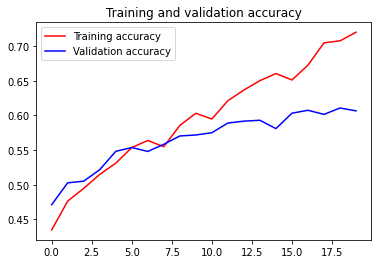

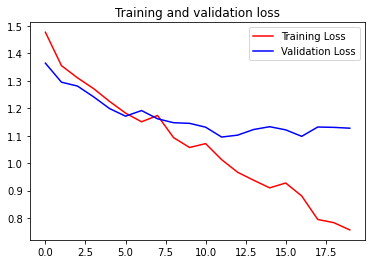

In [ ]:
history4_2 = model4_2.fit_generator(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=20,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=[callbacks])

modelEvaluate(model4_1)
modelHistogram(history4_1)

### model 4.3

In [ ]:
model4_3 = tf.keras.models.Sequential([   
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),   
                                    tf.keras.layers.Dropout(0.25),
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                                    tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),   
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
                                    tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),   
                                    tf.keras.layers.Dropout(0.25),

                                    tf.keras.layers.Flatten(), 

                                    tf.keras.layers.Dense(512, activation='relu'), 
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(7, activation= 'softmax')

                                    # tf.keras.layers.BatchNormalization(),
                                    ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
32/32 - 21s - loss: 0.9892 - accuracy: 0.6309 - val_loss: 1.0273 - val_accuracy: 0.6209 - 21s/epoch - 646ms/step
Epoch 2/50
32/32 - 19s - loss: 0.9476 - accuracy: 0.6428 - val_loss: 1.0284 - val_accuracy: 0.6207 - 19s/epoch - 603ms/step
Epoch 3/50
32/32 - 19s - loss: 0.9641 - accuracy: 0.6393 - val_loss: 1.0444 - val_accuracy: 0.6203 - 19s/epoch - 594ms/step
Epoch 4/50
32/32 - 19s - loss: 0.9418 - accuracy: 0.6455 - val_loss: 1.0275 - val_accuracy: 0.6277 - 19s/epoch - 596ms/step
Epoch 5/50
32/32 - 19s - loss: 0.9144 - accuracy: 0.6568 - val_loss: 1.0522 - val_accuracy: 0.6286 - 19s/epoch - 593ms/step
Epoch 6/50
32/32 - 19s - loss: 0.9063 - accuracy: 0.6606 - val_loss: 1.0800 - val_accuracy: 0.6149 - 19s/epoch - 591ms/step
Epoch 7/50
32/32 - 19s - loss: 0.9373 - accuracy: 0.6466 - val_loss: 1.0344 - val_accuracy: 0.6268 - 19s/epoch - 602ms/step
Epoch 8/50
32/32 - 20s - loss: 0.8996 - accuracy: 0.6639 - val_loss: 1.0410 - val_accuracy: 0.6251 - 20s/epoch - 630ms/step
Epoch 9/

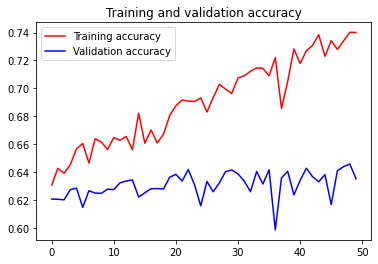

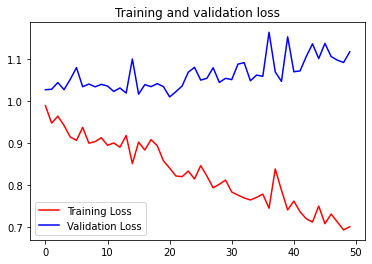

In [ ]:
from tensorflow.keras.optimizers import Adam

model4_3.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

history4_3 = model4_3.fit_generator(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=50,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=[callbacks])

modelEvaluate(model4_3)
modelHistogram(history4_3)

### Model 4.4


In [ ]:
model4_4 = tf.keras.models.Sequential([  
                                    tf.keras.layers.Conv2D(96, (3,3), activation="relu", input_shape=(48,48,1)),
                                    tf.keras.layers.Dropout(0.2),
                                     
                                    tf.keras.layers.Conv2D(96, (3,3), activation="relu" , padding='same'), 
                                    tf.keras.layers.Conv2D(96, (3,3), activation="relu" , padding='same', strides= 2), 

                                    tf.keras.layers.Conv2D(192, (3,3), activation="relu" , padding='same'), 
                                    tf.keras.layers.Conv2D(192, (3,3), activation="relu" , padding='same'), 
                                    tf.keras.layers.Conv2D(192, (3,3), activation="relu" , padding='same', strides= 2),  
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Conv2D(192, (3,3), activation="relu" , padding='same'), 
                                    tf.keras.layers.Conv2D(192, (1,1), activation="relu" , padding='same'), 
                                    tf.keras.layers.Conv2D(10, (1,1), activation="relu" , padding='valid'), 

                                    tf.keras.layers.GlobalAveragePooling2D(),

                                    tf.keras.layers.Dense(512, activation='relu'), 
                                    tf.keras.layers.Dense(7, activation= 'softmax')
                                    ])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator
train_datagen_4 = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest')

test_datagen_4 = ImageDataGenerator(
    rescale = 1./225, 
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest')

# Preprocess Data

train_generator_4 = train_datagen_4.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 900, #28821 dari total training / jumlah step (32)
    color_mode='grayscale',
    class_mode='categorical', 
)

validation_generator_4 = test_datagen_4.flow_from_directory(
    validation_dir,
    target_size = (48,48),
    batch_size = 112, # bagi 8 dari batch training
    color_mode='grayscale',
    class_mode = 'categorical', 
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
32/32 - 30s - loss: 1.7482 - accuracy: 0.2869 - val_loss: 1.7070 - val_accuracy: 0.3173 - 30s/epoch - 925ms/step
Epoch 2/100
32/32 - 29s - loss: 1.7067 - accuracy: 0.3061 - val_loss: 1.6761 - val_accuracy: 0.3262 - 29s/epoch - 911ms/step
Epoch 3/100
32/32 - 30s - loss: 1.6852 - accuracy: 0.3226 - val_loss: 1.6753 - val_accuracy: 0.3289 - 30s/epoch - 928ms/step
Epoch 4/100
32/32 - 30s - loss: 1.6554 - accuracy: 0.3353 - val_loss: 1.6207 - val_accuracy: 0.3513 - 30s/epoch - 947ms/step
Epoch 5/100
32/32 - 30s - loss: 1.6274 - accuracy: 0.3485 - val_loss: 1.5914 - val_accuracy: 0.3637 - 30s/epoch - 923ms/step
Epoch 6/100
32/32 - 30s - loss: 1.6224 - accuracy: 0.3500 - val_loss: 1.6085 - val_accuracy: 0.3607 - 30s/epoch - 939ms/step
Epoch 7/100
32/32 - 31s - loss: 1.5922 - accuracy: 0.3724 - val_loss: 1.5379 - val_accuracy: 0.3994 - 31s/epoch - 959ms/step
Epoch 8/100
32/32 - 30s - loss: 1.5539 - accuracy: 0.3906 - val_loss: 1.6181 - val_accuracy: 0.3619 - 30s/epoch - 936ms/step


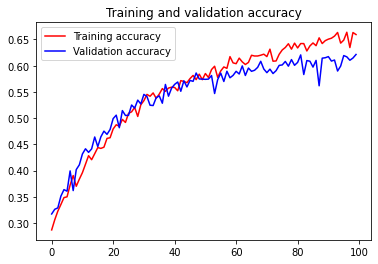

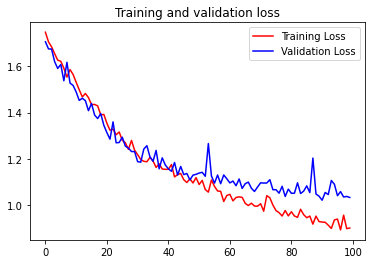

In [ ]:
from tensorflow.keras.optimizers import Adam

model4_4.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

history4_4 = model4_4.fit_generator(
      train_generator_4,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=100,
      validation_data=validation_generator_4,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=[callbacks])

modelEvaluate(model4_4)
modelHistogram(history4_4)

## Model 5 ( CNN Using Batch Normalization )

batch normalization

In [ ]:
def create_model(optim):
  model5 = Sequential()

  model5.add(Conv2D(6, (5,5),  padding='same' , activation="relu", input_shape=(48,48,1)) )
  model5.add(MaxPooling2D(2,2))
  model5.add(BatchNormalization())

  model5.add(Conv2D(16, (5,5),  padding='same' , activation="relu") )
  model5.add(MaxPooling2D(2,2))
  model5.add(BatchNormalization())

  model5.add(Flatten())
  model5.add(Dense(128, activation='relu'))
            
  model5.add(Dropout(0.5))

  model5.add(Dense(7, activation='softmax')) 

  model5.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
  return model5

In [ ]:
model5.summary()

In [ ]:
model5 = create_model(optims[1]) 

In [ ]:
history5 = model5.fit(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=50,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks)


Epoch 1/50
32/32 - 31s - loss: 1.9561 - accuracy: 0.2304 - val_loss: 1.9061 - val_accuracy: 0.2620 - 31s/epoch - 966ms/step
Epoch 2/50
32/32 - 17s - loss: 1.7856 - accuracy: 0.2674 - val_loss: 1.8578 - val_accuracy: 0.2822 - 17s/epoch - 537ms/step
Epoch 3/50
32/32 - 17s - loss: 1.7468 - accuracy: 0.2976 - val_loss: 1.7836 - val_accuracy: 0.2751 - 17s/epoch - 528ms/step
Epoch 4/50
32/32 - 17s - loss: 1.7141 - accuracy: 0.3165 - val_loss: 1.7780 - val_accuracy: 0.2833 - 17s/epoch - 532ms/step
Epoch 5/50
32/32 - 18s - loss: 1.6990 - accuracy: 0.3234 - val_loss: 1.7589 - val_accuracy: 0.2748 - 18s/epoch - 574ms/step
Epoch 6/50
32/32 - 17s - loss: 1.6694 - accuracy: 0.3409 - val_loss: 1.7956 - val_accuracy: 0.2629 - 17s/epoch - 541ms/step
Epoch 7/50
32/32 - 17s - loss: 1.6554 - accuracy: 0.3448 - val_loss: 1.7469 - val_accuracy: 0.2896 - 17s/epoch - 542ms/step
Epoch 8/50
32/32 - 17s - loss: 1.6346 - accuracy: 0.3566 - val_loss: 1.7844 - val_accuracy: 0.2821 - 17s/epoch - 540ms/step
Epoch 9/

64/64 [==============================] - 2s 27ms/step - loss: 1.2523 - accuracy: 0.5287
final train accuracy = 51.77 , validation accuracy = 52.87


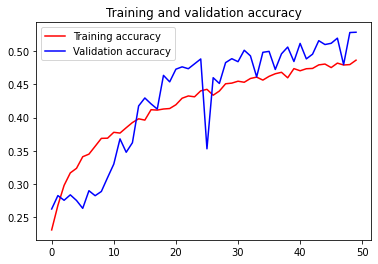

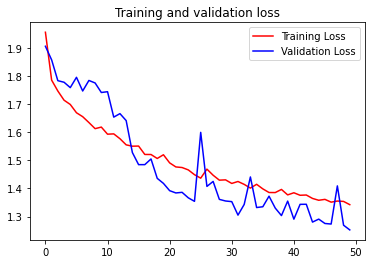

In [ ]:
modelEvaluate(model5,train_generator_1_2,validation_generator_1_2)
modelHistogram(history5)

## Model 6 ( CNN with More fully Connected Layers )

In [ ]:
def create_model6(optim):

  model6 = Sequential()

  # 1st cnn layer
  model6.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(48,48,1)))
  model6.add(MaxPooling2D((2, 2),padding='valid'))
  model6.add(Dropout(0.25))

  # 2nd cnn layer
  model6.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
  model6.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
  model6.add(Dropout(0.25))

  # 3rd cnn layer
  model6.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
  model6.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
  model6.add(Dropout(0.4))
 
  model6.add(Flatten())

  # 1st fully connected layer
  model6.add(Dense(2048, activation='linear'))
  model6.add(Dropout(0.3))
 
  # 2nd fully connected layer
  model6.add(Dense(1000, activation='linear'))
  model6.add(Dropout(0.3))

  # 3rd fully connected layer
  model6.add(Dense(250, activation='linear'))
  model6.add(Dropout(0.3))

  # 4th fully connected layer
  model6.add(Dense(80, activation='linear'))          
  model6.add(Dropout(0.3))

  # 5th fully connected layer
  model6.add(Dense(15, activation='linear'))          
  model6.add(Dropout(0.3)) 

  # output layer
  model6.add(Dense(7, activation='softmax'))

  model6.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
  return model6

In [ ]:
model6 = create_model6(optims[2]) 

In [ ]:
history6 = model6.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=100,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=[callbacks])

Epoch 1/100
32/32 - 124s - loss: 1.3696 - accuracy: 0.4840 - val_loss: 1.3281 - val_accuracy: 0.4956 - 124s/epoch - 4s/step
Epoch 2/100
32/32 - 122s - loss: 1.3832 - accuracy: 0.4801 - val_loss: 1.2886 - val_accuracy: 0.5166 - 122s/epoch - 4s/step
Epoch 3/100
32/32 - 122s - loss: 1.3442 - accuracy: 0.5000 - val_loss: 1.2816 - val_accuracy: 0.5215 - 122s/epoch - 4s/step
Epoch 4/100
32/32 - 122s - loss: 1.3671 - accuracy: 0.4837 - val_loss: 1.2965 - val_accuracy: 0.5174 - 122s/epoch - 4s/step
Epoch 5/100
32/32 - 121s - loss: 1.3562 - accuracy: 0.4917 - val_loss: 1.2901 - val_accuracy: 0.5157 - 121s/epoch - 4s/step
Epoch 6/100
32/32 - 121s - loss: 1.3400 - accuracy: 0.4965 - val_loss: 1.3155 - val_accuracy: 0.5098 - 121s/epoch - 4s/step
Epoch 7/100
32/32 - 123s - loss: 1.3434 - accuracy: 0.4943 - val_loss: 1.2743 - val_accuracy: 0.5229 - 123s/epoch - 4s/step
Epoch 8/100
32/32 - 123s - loss: 1.3214 - accuracy: 0.5042 - val_loss: 1.2502 - val_accuracy: 0.5317 - 123s/epoch - 4s/step
Epoch 9/

## Model 7 ( CNN with Linear & LeakyReLU Activation )
- development of relu activation

### model 7.0

In [ ]:
def create_model7(optim):

  model7 = Sequential()

  # 1st cnn layer
  model7.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(50,50,1)))
  model7.add(LeakyReLU(alpha=0.1))
  model7.add(MaxPooling2D((2, 2),padding='valid'))
  model7.add(Dropout(0.25))

  # 2nd cnn layer
  model7.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
  model7.add(LeakyReLU(alpha=0.1))
  model7.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
  model7.add(Dropout(0.25))

  # 3rd cnn layer
  model7.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
  model7.add(LeakyReLU(alpha=0.1))                  
  model7.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
  model7.add(Dropout(0.4))

  model7.add(Flatten())

  # 1st fully connected layer
  model7.add(Dense(128, activation='linear'))
  model7.add(LeakyReLU(alpha=0.1))           
  model7.add(Dropout(0.3))

  # 2nd fuly connected layer
  model7.add(Dense(64, activation='linear'))
  model7.add(LeakyReLU(alpha=0.1))           
  model7.add(Dropout(0.3))
  
  model7.add(Dense(7, activation='softmax'))

  model7.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
  return model7

In [ ]:
model7 = create_model7(optimizers.Adam())

In [ ]:
history7 = model7.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=50,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=[callbacks])
 

Epoch 1/50
32/32 - 10s - loss: 1.1345 - accuracy: 0.5703 - val_loss: 1.1078 - val_accuracy: 0.5819 - lr: 0.0010 - 10s/epoch - 318ms/step
Epoch 2/50
32/32 - 10s - loss: 1.1226 - accuracy: 0.5754 - val_loss: 1.1138 - val_accuracy: 0.5814 - lr: 0.0010 - 10s/epoch - 321ms/step
Epoch 3/50
32/32 - 10s - loss: 1.1133 - accuracy: 0.5790 - val_loss: 1.1036 - val_accuracy: 0.5887 - lr: 0.0010 - 10s/epoch - 319ms/step
Epoch 4/50
32/32 - 10s - loss: 1.1144 - accuracy: 0.5778 - val_loss: 1.1048 - val_accuracy: 0.5846 - lr: 0.0010 - 10s/epoch - 317ms/step
Epoch 5/50
32/32 - 10s - loss: 1.1024 - accuracy: 0.5878 - val_loss: 1.0902 - val_accuracy: 0.5917 - lr: 0.0010 - 10s/epoch - 321ms/step
Epoch 6/50
32/32 - 10s - loss: 1.0988 - accuracy: 0.5849 - val_loss: 1.1003 - val_accuracy: 0.5879 - lr: 0.0010 - 10s/epoch - 316ms/step
Epoch 7/50
32/32 - 10s - loss: 1.0943 - accuracy: 0.5881 - val_loss: 1.0832 - val_accuracy: 0.5948 - lr: 0.0010 - 10s/epoch - 318ms/step
Epoch 8/50
32/32 - 10s - loss: 1.0974 - a

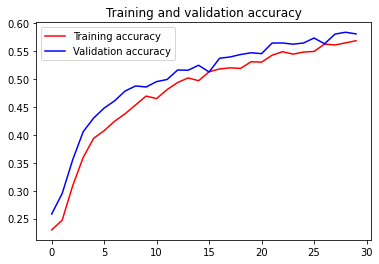

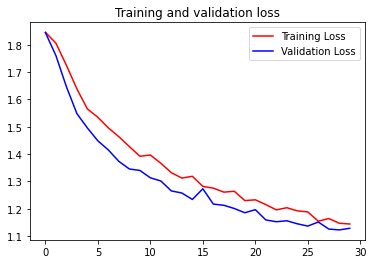

In [ ]:
modelHistogram(history7)

### model 7.2

In [ ]:
model7_2 = create_model7(optimizers.Adam(0.001))

Epoch 1/50
32/32 - 11s - loss: 1.8309 - accuracy: 0.2396 - val_loss: 1.8314 - val_accuracy: 0.2583 - lr: 0.0010 - 11s/epoch - 330ms/step
Epoch 2/50
32/32 - 10s - loss: 1.8039 - accuracy: 0.2478 - val_loss: 1.7781 - val_accuracy: 0.2720 - lr: 0.0010 - 10s/epoch - 321ms/step
Epoch 3/50
32/32 - 10s - loss: 1.7629 - accuracy: 0.2765 - val_loss: 1.6877 - val_accuracy: 0.3399 - lr: 0.0010 - 10s/epoch - 320ms/step
Epoch 4/50
32/32 - 11s - loss: 1.6806 - accuracy: 0.3354 - val_loss: 1.6071 - val_accuracy: 0.3862 - lr: 0.0010 - 11s/epoch - 335ms/step
Epoch 5/50
32/32 - 10s - loss: 1.6119 - accuracy: 0.3718 - val_loss: 1.5347 - val_accuracy: 0.4202 - lr: 0.0010 - 10s/epoch - 322ms/step
Epoch 6/50
32/32 - 10s - loss: 1.5598 - accuracy: 0.3946 - val_loss: 1.4859 - val_accuracy: 0.4209 - lr: 0.0010 - 10s/epoch - 317ms/step
Epoch 7/50
32/32 - 10s - loss: 1.5212 - accuracy: 0.4132 - val_loss: 1.4387 - val_accuracy: 0.4547 - lr: 0.0010 - 10s/epoch - 318ms/step
Epoch 8/50
32/32 - 10s - loss: 1.4938 - a

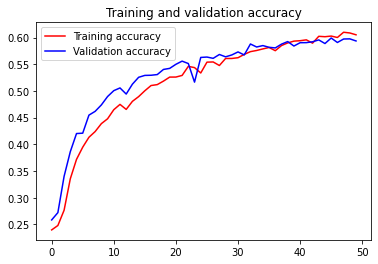

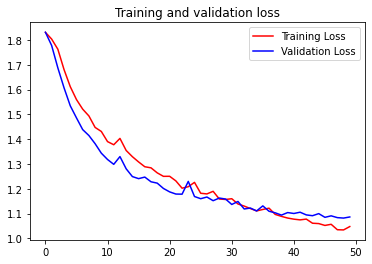

In [ ]:
history7_2 = model7_2.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=50,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks)

modelHistogram(history7_2)

## Model 8 ( CNN with Elu Activation )
- development of relu activation

In [ ]:
def create_model8(optim):
  model = Sequential()

  # 1st cnn layer
  model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())

  # 2nd cnn layer
  model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # 3rd cnn layer
  model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())

  # 4th cnn layer
  model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # 5th cnn layer
  model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())

  # 6th cnn layer
  model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # 7th cnn layer
  model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())

  # 8th cnn layer
  model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Flatten())

  # 1st fully connected layer
  model.add(Dense(64,kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  # 2nd fully connected layer
  model.add(Dense(64,kernel_initializer='he_normal'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(7,kernel_initializer='he_normal'))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
  return model

### model 8.0

In [ ]:
model8 = create_model8(RMSprop(learning_rate=0.001))

Epoch 1/30
32/32 - 29s - loss: 2.5176 - accuracy: 0.2245 - val_loss: 4.2185 - val_accuracy: 0.1595 - lr: 0.0010 - 29s/epoch - 901ms/step
Epoch 2/30
32/32 - 10s - loss: 2.0621 - accuracy: 0.2933 - val_loss: 2.0615 - val_accuracy: 0.2849 - lr: 0.0010 - 10s/epoch - 320ms/step
Epoch 3/30
32/32 - 10s - loss: 1.8152 - accuracy: 0.3419 - val_loss: 2.0694 - val_accuracy: 0.2675 - lr: 0.0010 - 10s/epoch - 325ms/step
Epoch 4/30
32/32 - 10s - loss: 1.6741 - accuracy: 0.3764 - val_loss: 1.8544 - val_accuracy: 0.3501 - lr: 0.0010 - 10s/epoch - 323ms/step
Epoch 5/30
32/32 - 10s - loss: 1.5674 - accuracy: 0.4064 - val_loss: 1.5462 - val_accuracy: 0.4393 - lr: 0.0010 - 10s/epoch - 322ms/step
Epoch 6/30
32/32 - 10s - loss: 1.4689 - accuracy: 0.4395 - val_loss: 1.4543 - val_accuracy: 0.4813 - lr: 0.0010 - 10s/epoch - 320ms/step
Epoch 7/30
32/32 - 10s - loss: 1.4042 - accuracy: 0.4653 - val_loss: 1.3746 - val_accuracy: 0.5064 - lr: 0.0010 - 10s/epoch - 325ms/step
Epoch 8/30
32/32 - 10s - loss: 1.3436 - a

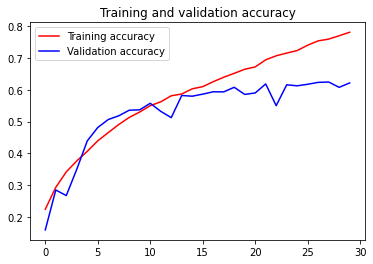

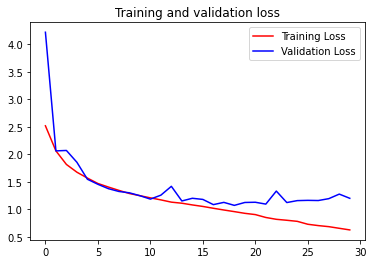

In [ ]:
history8 = model8.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=30,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks)

modelHistogram(history8)

In [ ]:
modelEvaluate(model8,train_generator,validation_generator)

64/64 [==============================] - 2s 35ms/step - loss: 1.1995 - accuracy: 0.6214
final train accuracy = 90.95 , validation accuracy = 62.14


### model 8.1

In [ ]:
model8_1 = create_model8(optimizers.Adam(0.001))

Epoch 1/60
32/32 - 16s - loss: 1.0280 - accuracy: 0.6262 - val_loss: 1.1752 - val_accuracy: 0.5795 - lr: 0.0010 - 16s/epoch - 496ms/step
Epoch 2/60
32/32 - 10s - loss: 1.0366 - accuracy: 0.6187 - val_loss: 1.1530 - val_accuracy: 0.5882 - lr: 0.0010 - 10s/epoch - 321ms/step
Epoch 3/60
32/32 - 10s - loss: 1.0321 - accuracy: 0.6199 - val_loss: 1.1158 - val_accuracy: 0.6026 - lr: 0.0010 - 10s/epoch - 325ms/step
Epoch 4/60
32/32 - 10s - loss: 1.0050 - accuracy: 0.6323 - val_loss: 1.1269 - val_accuracy: 0.5950 - lr: 0.0010 - 10s/epoch - 322ms/step
Epoch 5/60
32/32 - 10s - loss: 0.9517 - accuracy: 0.6535 - val_loss: 1.0642 - val_accuracy: 0.6153 - lr: 0.0010 - 10s/epoch - 326ms/step
Epoch 6/60
32/32 - 10s - loss: 0.9618 - accuracy: 0.6492 - val_loss: 1.1121 - val_accuracy: 0.5988 - lr: 0.0010 - 10s/epoch - 317ms/step
Epoch 7/60
32/32 - 11s - loss: 0.9464 - accuracy: 0.6537 - val_loss: 1.1059 - val_accuracy: 0.6105 - lr: 0.0010 - 11s/epoch - 330ms/step
Epoch 8/60
32/32 - 10s - loss: 0.9207 - a

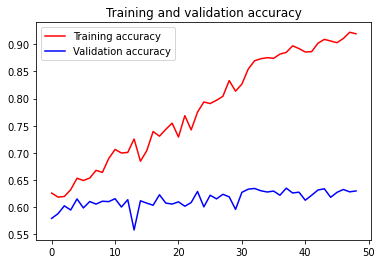

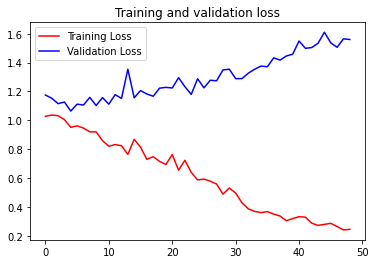

In [ ]:
history8_1 = model8_1.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks)

modelHistogram(history8_1)

In [ ]:
modelEvaluate(model8_1,train_generator,validation_generator)

64/64 [==============================] - 2s 31ms/step - loss: 1.4171 - accuracy: 0.6352
final train accuracy = 98.39 , validation accuracy = 63.52


### model 8.2

In [ ]:
model8_2 = create_model8(RMSprop(learning_rate=0.001))

Epoch 1/60
32/32 - 29s - loss: 2.6431 - accuracy: 0.1826 - val_loss: 4.9262 - val_accuracy: 0.1412 - lr: 0.0010 - 29s/epoch - 898ms/step
Epoch 2/60
32/32 - 20s - loss: 2.2685 - accuracy: 0.2280 - val_loss: 2.8165 - val_accuracy: 0.1765 - lr: 0.0010 - 20s/epoch - 612ms/step
Epoch 3/60
32/32 - 19s - loss: 2.0517 - accuracy: 0.2728 - val_loss: 2.0727 - val_accuracy: 0.2523 - lr: 0.0010 - 19s/epoch - 607ms/step
Epoch 4/60
32/32 - 19s - loss: 1.8584 - accuracy: 0.3160 - val_loss: 1.7019 - val_accuracy: 0.3614 - lr: 0.0010 - 19s/epoch - 601ms/step
Epoch 5/60
32/32 - 21s - loss: 1.7494 - accuracy: 0.3437 - val_loss: 1.5590 - val_accuracy: 0.4035 - lr: 0.0010 - 21s/epoch - 645ms/step
Epoch 6/60
32/32 - 19s - loss: 1.6701 - accuracy: 0.3721 - val_loss: 1.5243 - val_accuracy: 0.4241 - lr: 0.0010 - 19s/epoch - 609ms/step
Epoch 7/60
32/32 - 20s - loss: 1.5947 - accuracy: 0.3962 - val_loss: 1.4743 - val_accuracy: 0.4318 - lr: 0.0010 - 20s/epoch - 611ms/step
Epoch 8/60
32/32 - 19s - loss: 1.5535 - a

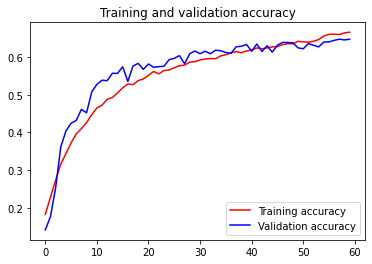

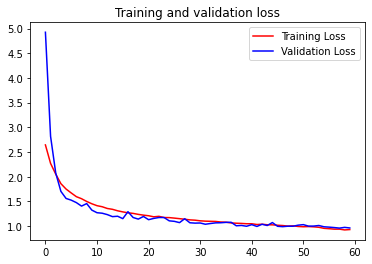

In [ ]:
history8_2 = model8_2.fit(
      train_generator_1_2,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator_1_2,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks1)

modelHistogram(history8_2)

Epoch 1/60
32/32 - 28s - loss: 2.5544 - accuracy: 0.1972 - val_loss: 13.5173 - val_accuracy: 0.1449 - lr: 0.0010 - 28s/epoch - 873ms/step
Epoch 2/60
32/32 - 9s - loss: 2.1070 - accuracy: 0.2814 - val_loss: 2.0133 - val_accuracy: 0.2846 - lr: 0.0010 - 9s/epoch - 297ms/step
Epoch 3/60
32/32 - 9s - loss: 1.8531 - accuracy: 0.3436 - val_loss: 1.6932 - val_accuracy: 0.3831 - lr: 0.0010 - 9s/epoch - 293ms/step
Epoch 4/60
32/32 - 10s - loss: 1.6746 - accuracy: 0.3841 - val_loss: 1.6121 - val_accuracy: 0.3978 - lr: 0.0010 - 10s/epoch - 298ms/step
Epoch 5/60
32/32 - 10s - loss: 1.5376 - accuracy: 0.4317 - val_loss: 2.0075 - val_accuracy: 0.3033 - lr: 0.0010 - 10s/epoch - 302ms/step
Epoch 6/60
32/32 - 10s - loss: 1.4823 - accuracy: 0.4501 - val_loss: 1.4759 - val_accuracy: 0.4505 - lr: 0.0010 - 10s/epoch - 299ms/step
Epoch 7/60
32/32 - 10s - loss: 1.4109 - accuracy: 0.4765 - val_loss: 1.3316 - val_accuracy: 0.4884 - lr: 0.0010 - 10s/epoch - 300ms/step
Epoch 8/60
32/32 - 10s - loss: 1.3546 - accu

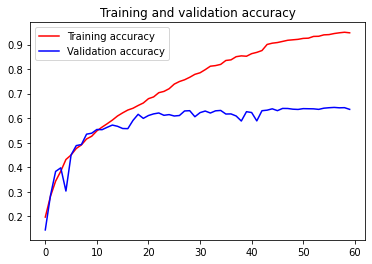

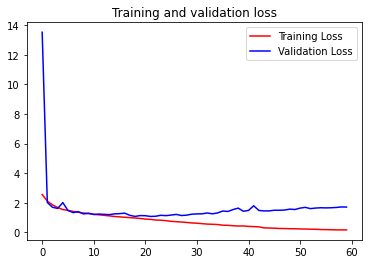

In [ ]:
history8_2 = model8_2.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks1)

modelHistogram(history8_2)

In [ ]:
modelEvaluate(model8_2,train_generator,validation_generator) 

64/64 [==============================] - 2s 30ms/step - loss: 1.9272 - accuracy: 0.6489
final train accuracy = 99.73 , validation accuracy = 64.89


In [ ]:
#save model menjadi .h5
model8_2.save('model8_2.h5')

Epoch 1/60
32/32 - 12s - loss: 0.3211 - accuracy: 0.8912 - val_loss: 1.1896 - val_accuracy: 0.6816 - lr: 7.8125e-06 - 12s/epoch - 381ms/step
Epoch 2/60
32/32 - 12s - loss: 0.3211 - accuracy: 0.8926 - val_loss: 1.1902 - val_accuracy: 0.6809 - lr: 7.8125e-06 - 12s/epoch - 375ms/step
Epoch 3/60
32/32 - 12s - loss: 0.3230 - accuracy: 0.8906 - val_loss: 1.1916 - val_accuracy: 0.6797 - lr: 7.8125e-06 - 12s/epoch - 360ms/step
Epoch 4/60
32/32 - 11s - loss: 0.3177 - accuracy: 0.8932 - val_loss: 1.1920 - val_accuracy: 0.6804 - lr: 7.8125e-06 - 11s/epoch - 350ms/step
Epoch 5/60
32/32 - 11s - loss: 0.3204 - accuracy: 0.8936 - val_loss: 1.1916 - val_accuracy: 0.6807 - lr: 7.8125e-06 - 11s/epoch - 352ms/step
Epoch 6/60
32/32 - 11s - loss: 0.3169 - accuracy: 0.8932 - val_loss: 1.1923 - val_accuracy: 0.6802 - lr: 7.8125e-06 - 11s/epoch - 346ms/step
Epoch 7/60
32/32 - 11s - loss: 0.3212 - accuracy: 0.8927 - val_loss: 1.1938 - val_accuracy: 0.6799 - lr: 7.8125e-06 - 11s/epoch - 358ms/step
Epoch 8/60

E

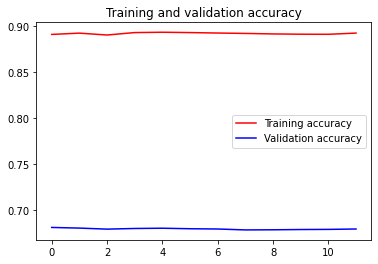

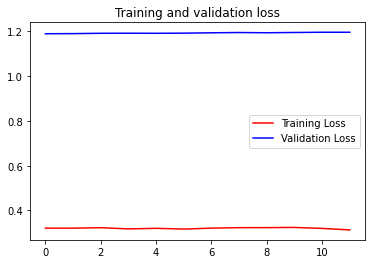

In [ ]:
history8_2_1 = model8_2.fit(
      train_generator,
      steps_per_epoch=32,  # 28821 images = batch_size * steps = 900 * 32
      epochs=60,
      validation_data=validation_generator,
      validation_steps=64,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      shuffle=True,
      callbacks=callbacks)

modelHistogram(history8_2_1)

In [ ]:
model8_4 = create_model8(RMSprop(learning_rate=0.001))

Epoch 1/30
900/900 - 32s - loss: 2.1037 - accuracy: 0.2059 - val_loss: 1.8020 - val_accuracy: 0.2382 - lr: 0.0010 - 32s/epoch - 36ms/step
Epoch 2/30
900/900 - 30s - loss: 1.7001 - accuracy: 0.3183 - val_loss: 1.4784 - val_accuracy: 0.4132 - lr: 0.0010 - 30s/epoch - 33ms/step
Epoch 3/30
900/900 - 29s - loss: 1.5124 - accuracy: 0.4091 - val_loss: 1.4345 - val_accuracy: 0.4467 - lr: 0.0010 - 29s/epoch - 32ms/step
Epoch 4/30
900/900 - 29s - loss: 1.4005 - accuracy: 0.4620 - val_loss: 1.4695 - val_accuracy: 0.4435 - lr: 0.0010 - 29s/epoch - 32ms/step
Epoch 5/30
900/900 - 29s - loss: 1.3364 - accuracy: 0.4937 - val_loss: 1.1875 - val_accuracy: 0.5439 - lr: 0.0010 - 29s/epoch - 32ms/step
Epoch 6/30
900/900 - 28s - loss: 1.2875 - accuracy: 0.5174 - val_loss: 1.1677 - val_accuracy: 0.5553 - lr: 0.0010 - 28s/epoch - 32ms/step
Epoch 7/30
900/900 - 28s - loss: 1.2533 - accuracy: 0.5346 - val_loss: 1.2861 - val_accuracy: 0.5178 - lr: 0.0010 - 28s/epoch - 31ms/step
Epoch 8/30
900/900 - 28s - loss: 1

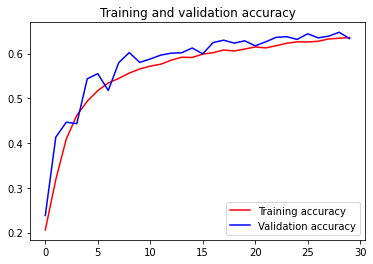

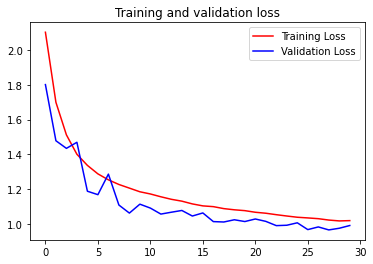

In [ ]:
history8_4 = model8_4.fit(
      train_generator_3, 
      steps_per_epoch=900,  # 28821 images = batch_size * steps = 900 * 32
      epochs=30,
      validation_data=validation_generator_3, 
      validation_steps=220,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks,
      use_multiprocessing=True)

modelHistogram(history8_4)

In [ ]:
history8_5 = model8_4.fit(
      train_generator_3, 
      steps_per_epoch=900,  # 28821 images = batch_size * steps = 900 * 32
      epochs=30,
      validation_data=validation_generator_3, 
      validation_steps=220,  # 7066 images = batch_size * steps = 112 * 64
      verbose=2,
      callbacks=callbacks,
      use_multiprocessing=True)

Epoch 1/30
900/900 - 28s - loss: 1.0113 - accuracy: 0.6392 - val_loss: 0.9580 - val_accuracy: 0.6493 - lr: 0.0010 - 28s/epoch - 31ms/step
Epoch 2/30
900/900 - 28s - loss: 1.0026 - accuracy: 0.6391 - val_loss: 0.9860 - val_accuracy: 0.6409 - lr: 0.0010 - 28s/epoch - 31ms/step
Epoch 3/30
900/900 - 27s - loss: 0.9982 - accuracy: 0.6415 - val_loss: 1.0139 - val_accuracy: 0.6341 - lr: 0.0010 - 27s/epoch - 31ms/step
Epoch 4/30
900/900 - 28s - loss: 0.9984 - accuracy: 0.6418 - val_loss: 1.0026 - val_accuracy: 0.6236 - lr: 0.0010 - 28s/epoch - 31ms/step
Epoch 5/30
900/900 - 28s - loss: 0.9913 - accuracy: 0.6464 - val_loss: 0.9504 - val_accuracy: 0.6533 - lr: 0.0010 - 28s/epoch - 31ms/step
Epoch 6/30
900/900 - 28s - loss: 0.9894 - accuracy: 0.6454 - val_loss: 0.9972 - val_accuracy: 0.6369 - lr: 0.0010 - 28s/epoch - 31ms/step
Epoch 7/30
900/900 - 27s - loss: 0.9849 - accuracy: 0.6482 - val_loss: 0.9859 - val_accuracy: 0.6470 - lr: 0.0010 - 27s/epoch - 30ms/step
Epoch 8/30
900/900 - 27s - loss: 0

## Model 9 (Reused model architecture 3)
- design model from [here](https://towardsdatascience.com/from-raw-images-to-real-time-predictions-with-deep-learning-ddbbda1be0e4)

In [ ]:
def createModel9(opt):

  nb_classes = 7

  # Initialising the CNN
  model = Sequential()

  # 1 - Convolution
  model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # 2nd Convolution layer
  model.add(Conv2D(128,(5,5), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # 3rd Convolution layer
  model.add(Conv2D(512,(3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # 4th Convolution layer
  model.add(Conv2D(512,(3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # Flattening
  model.add(Flatten())

  # Fully connected layer 1st layer
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  # Fully connected layer 2nd layer
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(nb_classes, activation='softmax'))


  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model9 = createModel9(optimizers.Adam(lr=0.001)) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# number of epochs to train the NN
epochs = 100

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history9 = model9.fit_generator(generator=train_generator_4,
                                steps_per_epoch=train_generator_4.n//train_generator_4.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator_4,
                                validation_steps = validation_generator_4.n//validation_generator_4.batch_size,
                                callbacks=callbacks1
                                )

Epoch 1/100
  1/225 [..............................] - ETA: 22s - loss: 0.4145 - accuracy: 0.8047

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


225/225 [==============================] - 13s 56ms/step - loss: 0.3776 - accuracy: 0.8599 - val_loss: 1.1798 - val_accuracy: 0.6577 - lr: 1.0000e-04
Epoch 2/100
225/225 [==============================] - 13s 56ms/step - loss: 0.3665 - accuracy: 0.8647 - val_loss: 1.2414 - val_accuracy: 0.6541 - lr: 1.0000e-04
Epoch 3/100
225/225 [==============================] - 13s 56ms/step - loss: 0.3612 - accuracy: 0.8672 - val_loss: 1.2420 - val_accuracy: 0.6457 - lr: 1.0000e-04
Epoch 4/100
225/225 [==============================] - 13s 56ms/step - loss: 0.3548 - accuracy: 0.8686 - val_loss: 1.2750 - val_accuracy: 0.6575 - lr: 1.0000e-04
Epoch 5/100
225/225 [==============================] - 13s 56ms/step - loss: 0.3520 - accuracy: 0.8721 - val_loss: 1.2465 - val_accuracy: 0.6587 - lr: 1.0000e-04
Epoch 6/100
225/225 [==============================] - 13s 57ms/step - loss: 0.3336 - accuracy: 0.8762 - val_loss: 1.3128 - val_accuracy: 0.6450 - lr: 1.0000e-04
Epoch 7/100
225/225 [===================

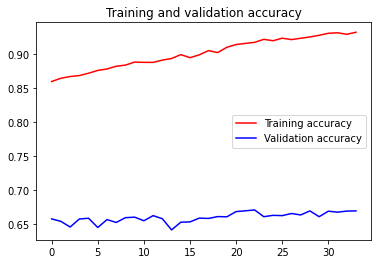

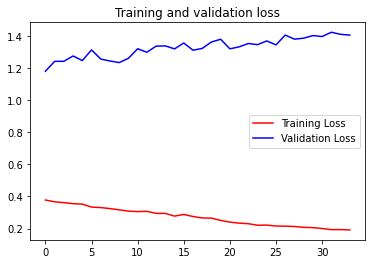

In [ ]:
modelHistogram(history9)

f1 score 0.6715256156241155


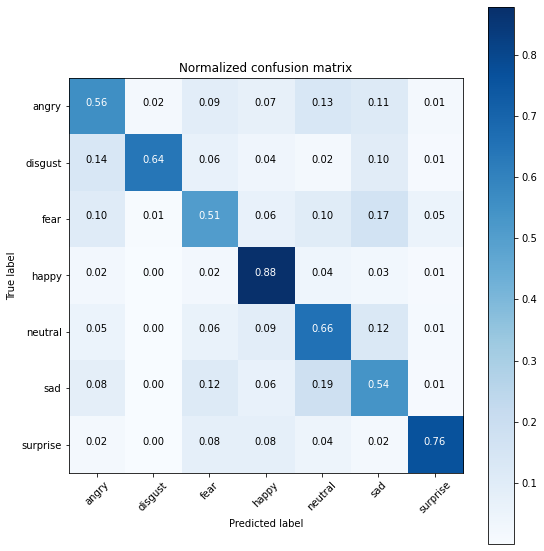

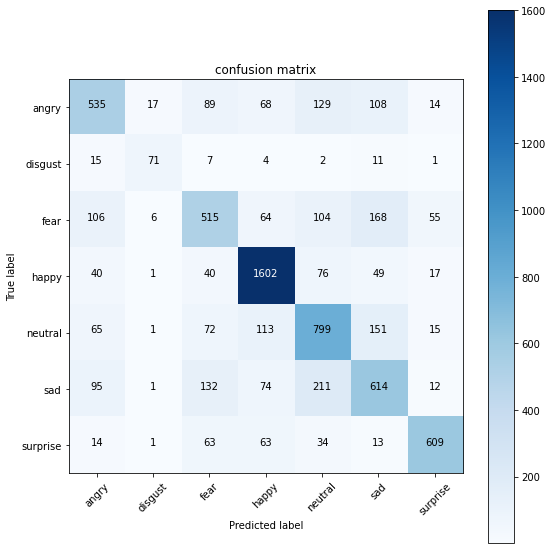

In [ ]:
f1score_conf(model9,validation_generator_4)

In [ ]:
model9_1 = createModel9(optims[3]) 

In [ ]:
history9_1 = model9_1.fit(
      train_generator_3, 
      steps_per_epoch=train_generator_3.n//train_generator_3.batch_size,
      epochs=100,
      validation_data=validation_generator_3, 
      validation_steps=validation_generator_3.n//validation_generator_3.batch_size,
      verbose=2,
      callbacks=callbacks1,
      use_multiprocessing=True)

Epoch 1/100
225/225 - 37s - loss: 1.9190 - accuracy: 0.2399 - val_loss: 1.8673 - val_accuracy: 0.1732 - lr: 0.0010 - 37s/epoch - 162ms/step
Epoch 2/100
225/225 - 23s - loss: 1.6515 - accuracy: 0.3509 - val_loss: 1.7414 - val_accuracy: 0.3224 - lr: 0.0010 - 23s/epoch - 102ms/step
Epoch 3/100
225/225 - 25s - loss: 1.4748 - accuracy: 0.4296 - val_loss: 1.3953 - val_accuracy: 0.4780 - lr: 0.0010 - 25s/epoch - 113ms/step
Epoch 4/100
225/225 - 23s - loss: 1.3905 - accuracy: 0.4670 - val_loss: 1.6343 - val_accuracy: 0.3595 - lr: 0.0010 - 23s/epoch - 103ms/step
Epoch 5/100
225/225 - 23s - loss: 1.3332 - accuracy: 0.4886 - val_loss: 1.2191 - val_accuracy: 0.5361 - lr: 0.0010 - 23s/epoch - 104ms/step
Epoch 6/100
225/225 - 23s - loss: 1.2910 - accuracy: 0.5072 - val_loss: 1.4873 - val_accuracy: 0.4009 - lr: 0.0010 - 23s/epoch - 102ms/step
Epoch 7/100
225/225 - 23s - loss: 1.2607 - accuracy: 0.5192 - val_loss: 1.1401 - val_accuracy: 0.5678 - lr: 0.0010 - 23s/epoch - 103ms/step
Epoch 8/100
225/225 

# Prediction

- we use model 3.1 because it has highest validation accuration and it's not too overfitting

- Our models managed to obtain a validation accuracy of approximately 40-69%, which is quite good given the fact that our target class has 7 possible values!


- load model

In [ ]:
# It can be used to reconstruct the model identically.
model_3_1_rev = keras.models.load_model("/content/drive/MyDrive/ML/proa/demo_day/model3_1_rev.h5")

- show f1 values

In [ ]:
test_generator =  validation_generator_3
y_true = test_generator.classes
y_hat =  model_3_1_rev.predict(test_generator)
y_hat = tf.argmax(y_hat, axis = 1).numpy()

print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       960
           1       0.83      0.57      0.67       111
           2       0.60      0.44      0.51      1018
           3       0.88      0.90      0.89      1825
           4       0.61      0.73      0.66      1216
           5       0.57      0.59      0.58      1139
           6       0.82      0.77      0.79       797

    accuracy                           0.70      7066
   macro avg       0.70      0.66      0.68      7066
weighted avg       0.70      0.70      0.69      7066



f1 score 0.6975658080951033


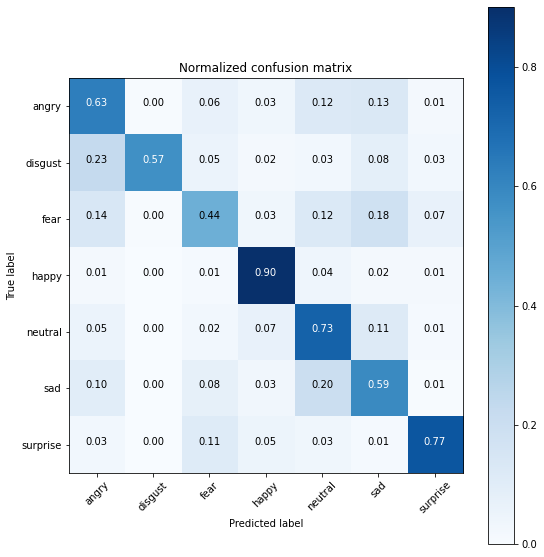

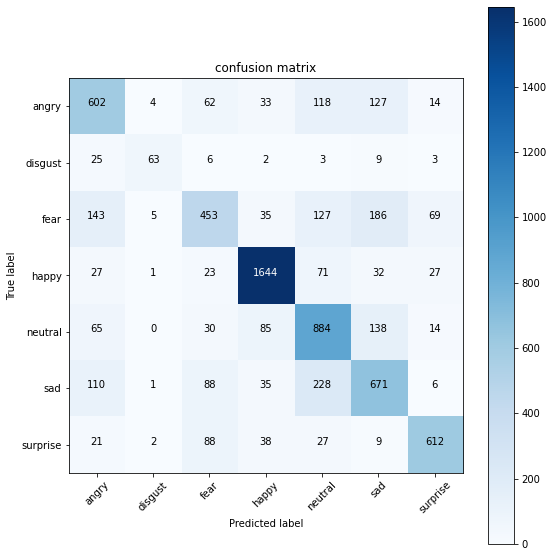

In [ ]:
f1score_conf(model_3_1_rev,validation_generator_3)

Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces because it confuses them with sad faces.

With more research and more resources this model could certainly be improved, but the goal of this study was primarily to focus on obtaining a fairly good model compared to what has been done in this field. 


In [ ]:
modelEvaluate(model_3_1_rev,train_generator_3,validation_generator_3)

56/56 [==============================] - 2s 40ms/step - loss: 0.8776 - accuracy: 0.6976
final train accuracy = 76.02 , validation accuracy = 69.76


## prediction ways 1

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
def predictImg1(img):
  # preprocessing input img
  img = np.array(img)
  plt.imshow(img)
  print(img.shape) #prints (48,48) that is the shape of our image

  img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
  img = img.reshape(1,48,48,1)
  img = img.astype('float')/255.0 #perlakuan yg sama dengan image saat training

  result = model_3_1_rev.predict(img)
  result = list(result[0])
  print(result)

  img_index = result.index(max(result))
  print(label_dict[img_index])
  plt.show()

(48, 48)
[0.0034605698, 9.6512274e-05, 0.6006591, 0.001805395, 0.0015784584, 0.009705533, 0.38269436]
Fear


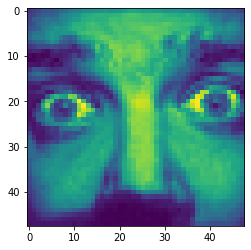

In [ ]:
img = image.load_img("/tmp/images/validation/fear/10029.jpg",target_size = (48,48),color_mode = "grayscale")

predictImg1(img)

## Prediction ways 2

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
def predict2(img):

  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Dectection and putting rectangle and cropping on the face
  faces= faceCascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in faces:
      roi_gray = gray[y:y+h,x:x+w] 

      roi_color=img[y:y+h, x:x+w]
      cv2.rectangle(img, (x,y),(x+w,y+h+12),(255,0,0),2)
      facess=faceCascade.detectMultiScale(roi_gray)
      if len(facess)==0:
          print("Face not detected")
      else:
        for(ex,ey,ew,eh) in facess:
            face_roi= roi_color[ey:ey+eh,ex:ex+ew]
            # face_roi= roi_gray[ey:ey+eh,ex:ex+ew]

  # show image
  f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  f.add_subplot(1,2, 2)
  plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
  plt.show(block=True)
 
   
  final_image=cv2.resize(face_roi,(48,48))
  final_image=cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
  final_image=np.expand_dims(final_image,axis=0)
  final_image=final_image/255.0

  #predicting the image emotion
  Predictions=model_3_1_rev.predict(final_image)
  print(Predictions)
  img_index = np.argmax(Predictions)  
  print(label_dict[img_index])

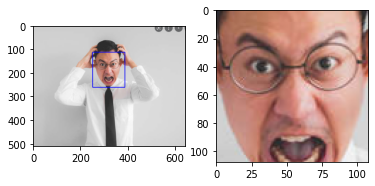

[[7.8251487e-01 4.6599089e-05 1.9568451e-01 1.0703154e-03 6.7838005e-07
  2.3913288e-05 2.0659022e-02]]
Angry


In [ ]:
img =cv2.imread("/tmp/example_angry.png")
predict2(img)

# Testing the Model using Real Time webcam in Google Colab Notebook:

In [ ]:
# Import Libaraires 

from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/drive/MyDrive/ML/model3_1_rev.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
#Finally detecting the face with live webcam
face_detect()

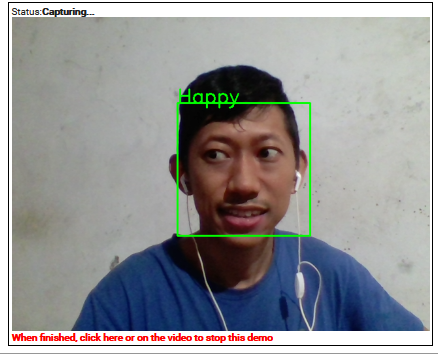

# Conclusion

- All model were evaluated
- Model 3.1 was choosen because it had the highest validation accuray of all model
- since, the emotion of disgust and suprise images are less therefore on webcam it hardly detect those emotions
 
- We experimented with many predefined CNN architectures as well as a custom CNN architecture and after a lot of trial and errors we came up with these models.

|model|Train Acc| Train Lost | Val Acc | Val Lost |
|--|:--:|:--:|:--:|:--:|
|Model 1.0 |0.56|0.40|0.57|1.28
|Model 1.1 |0.56|1.14|0.53|1.21
|Model 1.2 |0.56|1.15|0.57|1.16
|Model 1.3 |0.98|0.05|0.57|1.90
|Model 1.4 |0.49|1.50|0.50|1.42
|Model 1.5 |0.93|0.19|0.57|1.67
|Model 1.6 |0.64|0.96|0.96|1.12
||||||
|Model 2   |0.29|1.72|0.28|1.74
||||||
|Model 3.0 |0.50|1.26|0.50|1.29
|Model 3.1 |0.75|0.65|0.68|0.90
||||||
|Model 4.1 |0.99|0.04|0.52|2.26
|Model 4.2 |0.96|0.11|0.65|1.13
|Model 4.3 |0.69|0.81|0.64|1.00
|Model 4.4 |0.97|0.09|0.49|4.10
|Model 4.5 |0.50|1.30|0.52|1.24
||||||
|Model 5.0 |0.44|1.44|0.46|1.41
|Model 5.1 |0.49|1.34|0.53|1.25
||||||
|Model 6   |0.55|1.17|0.53|1.25
||||||
|Model 7.0 |0.65|0.92|0.61|1.04
|Model 7.2 |0.60|1.04|0.69|1.08
||||||
|Model 8.0 |0.78|0.62|0.62|1.19
|Model 8.1 |0.91|0.24|0.63|1.55
|Model 8.2 |0.66|0.92|0.64|0.96
|Model 8.4 |0.63|1.01|0.63|0.98
|Model 8.5 |0.69|0.86|0.67|0.93
||||||
|Model 9   |0.74|0.66|0.64|1.03

<br>
 
- Highest efficiency in terms of accuracy and execution time is given by model 3.1 model so we consider it as our final model.
- Best performing model predicts the happy and surprised emotions quite good but struggles to predict the fear and disgust emotions.




